In [1]:
# Import the NumPy and Pandas packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [2]:
from sklearn.metrics import (confusion_matrix, recall_score, precision_score, roc_auc_score,
                                accuracy_score, f1_score, plot_confusion_matrix, confusion_matrix,
                                roc_curve, auc)
from sklearn.model_selection import (cross_val_score, cross_validate, train_test_split)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


In [74]:
# Read the dataset

df = pd.read_excel('Churn Rev.xlsx')

In [75]:
# Inspect the shape of the dataset

df.shape

(30000, 72)

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 72 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MUSTERIID                   30000 non-null  int64  
 1   GUNCEL_SEGMENT              29658 non-null  object 
 2   DEBIT_MAX_LOGIN_TAR         23684 non-null  object 
 3   DEBIT_MAX_FIN_ISLM_TAR      21830 non-null  object 
 4   DEBIT_FIN_ISLEM_GECEN_SURE  21830 non-null  float64
 5   DEBIT_LOGIN_GECEN_SURE      23684 non-null  float64
 6   VDSZ_BKYORT_Ilk3            28306 non-null  float64
 7   VDSZ_BKYORT_Ikinci3         28226 non-null  float64
 8   VDSZ_BKYORT_Ucuncu3         28177 non-null  float64
 9   MUS_OLM_TAR                 0 non-null      float64
 10  MUS_GIRIS_TAR               29658 non-null  object 
 11  MUSTERILIK_YASI             29658 non-null  float64
 12  MUSTERI_YASI                29658 non-null  float64
 13  KK_ACLS_MAX_TAR             229

In [77]:
df_0 = df[df["TERK_FLAG"] == 0]
df_1 = df[df["TERK_FLAG"] == 1]

In [78]:
df_0.shape

(27901, 72)

In [79]:
df_1.shape

(2099, 72)

In [80]:
df.head(5)

,MUSTERIID,GUNCEL_SEGMENT,DEBIT_MAX_LOGIN_TAR,DEBIT_MAX_FIN_ISLM_TAR,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUS_OLM_TAR,MUS_GIRIS_TAR,MUSTERILIK_YASI,MUSTERI_YASI,KK_ACLS_MAX_TAR,KK_MAX_ISLM_TAR,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MUS_CINSIYET,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,INT_ORT_Ilk3,INT_ORT_Ikinci3,INT_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,INT_LOGIN_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,KNT_KPNS_MAX_TAR,KNT_VADE_MAX_TAR,MUS_MAAS_MAX_TAR,OTO_KPNS_MAX_TAR,OTO_VADE_MAX_TAR,TIK_KPNS_MAX_TAR,TIK_VADE_MAX_TAR,TIK_KPNS_MAX_TAR_GECENSURE,TIK_VADE_MAX_TAR_GECENSURE,OTO_KPNS_MAX_TAR_GECENSURE,OTO_VADE_MAX_TAR_GECENSURE,KNT_KPNS_MAX_TAR_GECENSURE,KNT_VADE_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDL_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,VDL_BKYORT_Ilk3,VDL_BKYORT_Ikinci3,VDL_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG,TIK_S6A_KPNS_SY,BKRD_RISK_ORT
0,1,UKT,NaN,NaN,NaN,NaN,0.930,1.097,1.260,NaN,2002-04-29 16:03:59,18.992,53.279,2008-01-15 00:00:00,2021-03-22 00:00:00,1,1.0,K,NaN,NaN,NaN,NaN,NaN,NaN,0.667,0.333,0.333,22.0,49.0,NaN,NaN,NaN,221.0,22.0,1.333,1.667,1.333,0,0,NaN,NaN,NaN,NaN,NaN,NaN,2012-07-15 00:00:00,NaN,3181.0,NaN,NaN,NaN,NaN,22.0,NaN,9.0,NaN,1.0,0.0,1451.0,343.227,344.757,391.45,0.000,0.000,0.00,25422.023,25772.377,26533.39,0,0,NaN,NaN
1,2,IKT,2021-03-27 00:00:00,2021-03-20 00:00:00,11.0,4.0,35.507,62.923,83.367,NaN,2002-01-25 00:00:00,19.250,52.474,2015-04-18 00:00:00,NaN,1,1.0,E,23.333,20.667,16.667,NaN,NaN,NaN,1.000,2.000,0.333,16.0,16.0,0.0,2.0,441.0,5.0,40.0,0.000,0.000,0.000,0,0,NaN,NaN,2021-03-15 00:00:00,NaN,NaN,NaN,2010-12-18 00:00:00,NaN,3756.0,NaN,NaN,NaN,NaN,16.0,NaN,NaN,0.0,40.0,NaN,20.0,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,1,0,NaN,NaN
2,3,VIP,2021-03-31 00:00:00,2021-03-31 00:00:00,0.0,0.0,4620.410,3338.493,4524.997,NaN,2001-05-22 13:45:00,19.929,77.711,2020-05-15 00:00:00,2021-03-28 00:00:00,1,0.0,E,0.000,0.000,0.000,NaN,NaN,NaN,1.000,2.000,0.667,0.0,0.0,14.0,NaN,NaN,79.0,8.0,6.667,7.333,6.333,0,0,NaN,NaN,2021-03-01 00:00:00,NaN,NaN,NaN,2010-12-24 00:00:00,NaN,3750.0,NaN,NaN,NaN,NaN,0.0,250.0,3.0,14.0,8.0,0.0,0.0,673.253,2364.497,1907.26,13756.407,4893.107,4541.09,1369189.700,1367682.507,1357406.84,0,0,NaN,NaN
3,4,UKT,2021-03-19 00:00:00,2021-03-19 00:00:00,12.0,12.0,3198.270,3743.487,5802.043,NaN,2002-04-22 17:43:33,19.012,43.639,2021-03-30 00:00:00,2021-03-30 00:00:00,1,1.0,E,14.000,11.000,8.333,NaN,NaN,NaN,4.000,2.000,0.667,14.0,14.0,0.0,1.0,NaN,146.0,236.0,1.333,1.333,0.667,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,1.0,0.0,79.0,NaN,2.0,2667.753,548.773,1740.02,0.000,0.000,0.00,NaN,NaN,NaN,0,0,NaN,NaN
4,5,KIT,2021-03-17 00:00:00,2021-03-17 00:00:00,14.0,14.0,791.360,1864.890,9370.647,NaN,2000-08-29 15:52:00,20.657,53.577,2009-04-16 00:00:00,NaN,1,1.0,K,4.333,6.333,10.000,0.0,0.0,0.0,0.333,0.000,0.333,14.0,14.0,0.0,7.0,350.0,33.0,968.0,2.000,2.000,1.667,0,0,NaN,NaN,2020-07-15 00:00:00,NaN,NaN,NaN,2014-01-21 00:00:00,NaN,2626.0,NaN,NaN,NaN,NaN,14.0,7.0,NaN,0.0,202.0,NaN,0.0,NaN,NaN,NaN,0.000,0.000,0.00,NaN,NaN,NaN,0,0,NaN,NaN


In [81]:
#Finding about Included Columns in the Dataset

columns = df.columns
print(columns)

Index(['MUSTERIID', 'GUNCEL_SEGMENT', 'DEBIT_MAX_LOGIN_TAR',
       'DEBIT_MAX_FIN_ISLM_TAR', 'DEBIT_FIN_ISLEM_GECEN_SURE',
       'DEBIT_LOGIN_GECEN_SURE', 'VDSZ_BKYORT_Ilk3', 'VDSZ_BKYORT_Ikinci3',
       'VDSZ_BKYORT_Ucuncu3', 'MUS_OLM_TAR', 'MUS_GIRIS_TAR',
       'MUSTERILIK_YASI', 'MUSTERI_YASI', 'KK_ACLS_MAX_TAR', 'KK_MAX_ISLM_TAR',
       'VDSZ_SHPLK_FLAG', 'MUS_CLSYRM_FLAG', 'MUS_CINSIYET', 'MBL_ORT_Ilk3',
       'MBL_ORT_Ikinci3', 'MBL_ORT_Ucuncu3', 'INT_ORT_Ilk3', 'INT_ORT_Ikinci3',
       'INT_ORT_Ucuncu3', 'ATM_ORT_Ilk3', 'ATM_ORT_Ikinci3', 'ATM_ORT_Ucuncu3',
       'ATM_LOGIN_GECEN_SURE', 'ATM_FIN_ISLEM_GECEN_SURE',
       'MB_LOGIN_GECEN_SURE', 'MB_FIN_ISLEM_GECEN_SURE',
       'INT_LOGIN_GECEN_SURE', 'CM_LOGIN_GECEN_SURE',
       'SUBE_FIN_ISLEM_GECEN_SURE', 'DZN_ODMSYORT_Ilk3',
       'DZN_ODMSYORT_Ikinci3', 'DZN_ODMSYORT_Ucuncu3', 'DZN_ODM_Flag',
       'TERK_FLAG', 'KNT_KPNS_MAX_TAR', 'KNT_VADE_MAX_TAR', 'MUS_MAAS_MAX_TAR',
       'OTO_KPNS_MAX_TAR', 'OTO_VADE_MAX_TA

In [82]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

/Users/furkanoruc/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  after removing the cwd from sys.path.


In [83]:
#count nan

(df.isna().sum()/len(df))*100

MUSTERIID                     0.000000  
GUNCEL_SEGMENT                1.140000  
DEBIT_MAX_LOGIN_TAR           21.053333 
DEBIT_MAX_FIN_ISLM_TAR        27.233333 
DEBIT_FIN_ISLEM_GECEN_SURE    27.233333 
DEBIT_LOGIN_GECEN_SURE        21.053333 
VDSZ_BKYORT_Ilk3              5.646667  
VDSZ_BKYORT_Ikinci3           5.913333  
VDSZ_BKYORT_Ucuncu3           6.076667  
MUS_OLM_TAR                   100.000000
MUS_GIRIS_TAR                 1.140000  
MUSTERILIK_YASI               1.140000  
MUSTERI_YASI                  1.140000  
KK_ACLS_MAX_TAR               23.476667 
KK_MAX_ISLM_TAR               58.843333 
VDSZ_SHPLK_FLAG               0.000000  
MUS_CLSYRM_FLAG               1.093333  
MUS_CINSIYET                  1.093333  
MBL_ORT_Ilk3                  54.210000 
MBL_ORT_Ikinci3               54.210000 
MBL_ORT_Ucuncu3               54.210000 
INT_ORT_Ilk3                  78.836667 
INT_ORT_Ikinci3               78.836667 
INT_ORT_Ucuncu3               78.836667 
ATM_ORT_Ilk3    

In [84]:
# Drop all the columns in which greater than 20000 missing values are present

for col in df.columns:
    if df[col].isna().sum() > 20000:
        df.drop(col, 1, inplace=True)

In [85]:
df.shape

(30000, 53)

In [86]:
df.columns

Index(['MUSTERIID', 'GUNCEL_SEGMENT', 'DEBIT_MAX_LOGIN_TAR',
       'DEBIT_MAX_FIN_ISLM_TAR', 'DEBIT_FIN_ISLEM_GECEN_SURE',
       'DEBIT_LOGIN_GECEN_SURE', 'VDSZ_BKYORT_Ilk3', 'VDSZ_BKYORT_Ikinci3',
       'VDSZ_BKYORT_Ucuncu3', 'MUS_GIRIS_TAR', 'MUSTERILIK_YASI',
       'MUSTERI_YASI', 'KK_ACLS_MAX_TAR', 'KK_MAX_ISLM_TAR', 'VDSZ_SHPLK_FLAG',
       'MUS_CLSYRM_FLAG', 'MUS_CINSIYET', 'MBL_ORT_Ilk3', 'MBL_ORT_Ikinci3',
       'MBL_ORT_Ucuncu3', 'ATM_ORT_Ilk3', 'ATM_ORT_Ikinci3', 'ATM_ORT_Ucuncu3',
       'ATM_LOGIN_GECEN_SURE', 'ATM_FIN_ISLEM_GECEN_SURE',
       'MB_LOGIN_GECEN_SURE', 'MB_FIN_ISLEM_GECEN_SURE', 'CM_LOGIN_GECEN_SURE',
       'SUBE_FIN_ISLEM_GECEN_SURE', 'DZN_ODMSYORT_Ilk3',
       'DZN_ODMSYORT_Ikinci3', 'DZN_ODMSYORT_Ucuncu3', 'DZN_ODM_Flag',
       'TERK_FLAG', 'MUS_MAAS_MAX_TAR', 'TIK_KPNS_MAX_TAR', 'TIK_VADE_MAX_TAR',
       'TIK_KPNS_MAX_TAR_GECENSURE', 'TIK_VADE_MAX_TAR_GECENSURE',
       'ATM_TERK_TAR_GECENSURE', 'KMH_TERK_TAR_GECENSURE',
       'KK_TERK_TAR_GECE

In [87]:
df.groupby("GUNCEL_SEGMENT").TERK_FLAG.mean()

GUNCEL_SEGMENT
IKT    0.236562
KIT    0.028048
ORU    0.008811
OZL    0.015442
UKT    0.009857
VIP    0.009524
Name: TERK_FLAG, dtype: float64

In [88]:
df.groupby("MUS_TKP_FLAG").TERK_FLAG.mean()

MUS_TKP_FLAG
0    0.067399
1    0.139513
Name: TERK_FLAG, dtype: float64

In [89]:
df.groupby("DZN_ODM_Flag").TERK_FLAG.mean()

DZN_ODM_Flag
0    0.015017
1    0.096311
Name: TERK_FLAG, dtype: float64

In [90]:
df.groupby("VDSZ_SHPLK_FLAG").TERK_FLAG.mean()

VDSZ_SHPLK_FLAG
0    0.356495
1    0.063501
Name: TERK_FLAG, dtype: float64

In [91]:
df.groupby("MUS_CLSYRM_FLAG").TERK_FLAG.mean()

MUS_CLSYRM_FLAG
0.0    0.046039
1.0    0.102089
2.0    0.250000
Name: TERK_FLAG, dtype: float64

Text(0.5, 0, 'GUNCEL_SEGMENT')

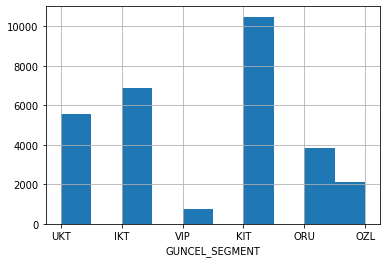

In [92]:

df.GUNCEL_SEGMENT.hist()
plt.xlabel('GUNCEL_SEGMENT')


Text(0.5, 0, 'DZN_ODM_Flag')

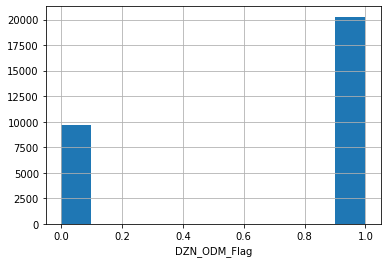

In [22]:

df.DZN_ODM_Flag.hist()
plt.xlabel('DZN_ODM_Flag')


Text(0.5, 0, 'VDSZ_SHPLK_FLAG')

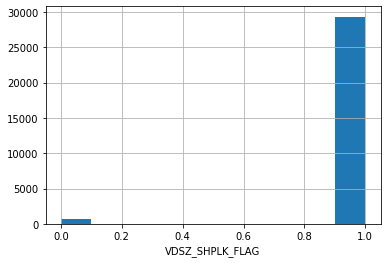

In [23]:

df.VDSZ_SHPLK_FLAG.hist()
plt.xlabel('VDSZ_SHPLK_FLAG')


Text(0.5, 0, 'MUS_CLSYRM_FLAG')

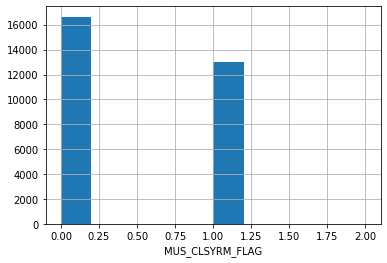

In [24]:

df.MUS_CLSYRM_FLAG.hist()
plt.xlabel('MUS_CLSYRM_FLAG')


In [25]:
df_corr = df.corr(method= "pearson")
df_corr

,MUSTERIID,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUSTERILIK_YASI,MUSTERI_YASI,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,TIK_KPNS_MAX_TAR_GECENSURE,TIK_VADE_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG
MUSTERIID,1.000000,-0.040830,-0.041306,-0.035706,-0.035055,-0.034222,0.527820,0.287046,0.182819,-0.120003,-0.031077,-0.033168,-0.033772,0.010668,0.012297,0.011607,-0.034433,-0.044767,0.035774,0.016715,0.035520,-0.025050,-0.010123,-0.008292,-0.010781,-0.028169,-0.030160,0.070828,0.136153,-0.029566,0.048509,-0.020030,0.035774,-0.021923,-0.008948,-0.089012,-0.084892,-0.076743,-0.039206,-0.039108,-0.042799,-0.027064,-0.022204
DEBIT_FIN_ISLEM_GECEN_SURE,-0.040830,1.000000,0.818660,-0.002398,-0.001868,-0.005553,-0.070010,-0.172678,NaN,0.163374,-0.051625,-0.050054,-0.065981,-0.312598,-0.298503,-0.286187,0.715641,0.774684,0.119056,0.236470,0.091477,0.062207,-0.108752,-0.104875,-0.100263,0.083196,0.070172,0.049559,0.033436,0.744391,0.223037,0.107691,0.119056,0.102769,0.222674,-0.069173,-0.055720,-0.042648,0.009159,0.008297,0.008117,0.051963,-0.024799
DEBIT_LOGIN_GECEN_SURE,-0.041306,0.818660,1.000000,-0.015308,-0.015532,-0.018285,-0.081872,-0.151682,NaN,0.143614,-0.041910,-0.044271,-0.058724,-0.268543,-0.263642,-0.259993,0.603387,0.570539,0.128942,0.223420,0.111935,0.060257,-0.121608,-0.118775,-0.115746,0.127149,0.106061,0.112944,0.071283,0.624843,0.197896,0.064941,0.128942,0.070279,0.332491,-0.067644,-0.053280,-0.051908,0.004531,0.002651,-0.000666,0.087194,-0.034714
VDSZ_BKYORT_Ilk3,-0.035706,-0.002398,-0.015308,1.000000,0.930240,0.840716,0.034176,-0.036782,NaN,0.017177,0.038453,0.036546,0.047182,0.025920,0.030989,0.030639,-0.009458,-0.002879,-0.046484,-0.060139,-0.018404,-0.061753,0.152430,0.153564,0.149347,-0.097187,-0.036142,0.018145,0.032555,-0.008767,0.010295,-0.034245,-0.046484,-0.047766,-0.074321,0.080579,0.078276,0.080195,0.076134,0.086506,0.083742,-0.029286,0.069998
VDSZ_BKYORT_Ikinci3,-0.035055,-0.001868,-0.015532,0.930240,1.000000,0.921213,0.036162,-0.040180,NaN,0.016108,0.046470,0.043523,0.052121,0.029477,0.037480,0.035625,-0.008106,-0.003459,-0.047618,-0.061622,-0.019466,-0.064526,0.151741,0.152598,0.148570,-0.099667,-0.037103,0.021810,0.024110,-0.007700,0.006791,-0.034213,-0.047618,-0.048249,-0.074327,0.076899,0.074176,0.075862,0.075848,0.075945,0.068965,-0.029161,0.069744
VDSZ_BKYORT_Ucuncu3,-0.034222,-0.005553,-0.018285,0.840716,0.921213,1.000000,0.038710,-0.043218,NaN,0.019367,0.046583,0.042602,0.054286,0.029729,0.038290,0.038431,-0.011848,-0.007214,-0.047416,-0.061737,-0.019091,-0.063948,0.153316,0.154449,0.150045,-0.103752,-0.038118,0.018955,0.012104,-0.011359,0.002553,-0.033269,-0.047416,-0.045430,-0.076491,0.079549,0.077878,0.077017,0.077455,0.081637,0.068473,-0.030522,0.070392
MUSTERILIK_YASI,0.527820,-0.070010,-0.081872,0.034176,0.036162,0.038710,1.000000,0.398918,0.324911,-0.163829,0.030273,0.032864,0.045930,0.087461,0.093366,0.098264,-0.052140,-0.082332,0.001964,-0.044893,0.040139,-0.055866,0.148076,0.148881,0.147360,-0.139219,-0.085026,0.083471,0.172974,-0.044879,0.011285,-0.077025,0.001964,-0.057539,-0.057967,0.103396,0.105303,0.115934,0.036755,0.041526,0.044053,-0.027608,0.056929
MUSTERI_YASI,0.287046,-0.172678,-0.151682,-0.036782,-0.040180,-0.043218,0.398918,1.000000,0.119607,-0.603871,-0.056295,-0.056101,-0.076383,0.037557,0.015038,0.013163,-0.166225,-0.168225,0.176503,0.091487,0.064816,-0.11550

In [26]:
df.head()

,MUSTERIID,GUNCEL_SEGMENT,DEBIT_MAX_LOGIN_TAR,DEBIT_MAX_FIN_ISLM_TAR,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUS_GIRIS_TAR,MUSTERILIK_YASI,MUSTERI_YASI,KK_ACLS_MAX_TAR,KK_MAX_ISLM_TAR,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MUS_CINSIYET,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,MUS_MAAS_MAX_TAR,TIK_KPNS_MAX_TAR,TIK_VADE_MAX_TAR,TIK_KPNS_MAX_TAR_GECENSURE,TIK_VADE_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG
0,1,UKT,NaN,NaN,NaN,NaN,0.930,1.097,1.260,2002-04-29 16:03:59,18.992,53.279,2008-01-15 00:00:00,2021-03-22 00:00:00,1,1.0,K,NaN,NaN,NaN,0.667,0.333,0.333,22.0,49.0,NaN,NaN,221.0,22.0,1.333,1.667,1.333,0,0,NaN,NaN,2012-07-15 00:00:00,NaN,3181.0,22.0,NaN,9.0,NaN,1.0,1451.0,343.227,344.757,391.45,0.000,0.000,0.00,0,0
1,2,IKT,2021-03-27 00:00:00,2021-03-20 00:00:00,11.0,4.0,35.507,62.923,83.367,2002-01-25 00:00:00,19.250,52.474,2015-04-18 00:00:00,NaN,1,1.0,E,23.333,20.667,16.667,1.000,2.000,0.333,16.0,16.0,0.0,2.0,5.0,40.0,0.000,0.000,0.000,0,0,2021-03-15 00:00:00,NaN,2010-12-18 00:00:00,NaN,3756.0,16.0,NaN,NaN,0.0,40.0,20.0,NaN,NaN,NaN,0.000,0.000,0.00,1,0
2,3,VIP,2021-03-31 00:00:00,2021-03-31 00:00:00,0.0,0.0,4620.410,3338.493,4524.997,2001-05-22 13:45:00,19.929,77.711,2020-05-15 00:00:00,2021-03-28 00:00:00,1,0.0,E,0.000,0.000,0.000,1.000,2.000,0.667,0.0,0.0,14.0,NaN,79.0,8.0,6.667,7.333,6.333,0,0,2021-03-01 00:00:00,NaN,2010-12-24 00:00:00,NaN,3750.0,0.0,250.0,3.0,14.0,8.0,0.0,673.253,2364.497,1907.26,13756.407,4893.107,4541.09,0,0
3,4,UKT,2021-03-19 00:00:00,2021-03-19 00:00:00,12.0,12.0,3198.270,3743.487,5802.043,2002-04-22 17:43:33,19.012,43.639,2021-03-30 00:00:00,2021-03-30 00:00:00,1,1.0,E,14.000,11.000,8.333,4.000,2.000,0.667,14.0,14.0,0.0,1.0,146.0,236.0,1.333,1.333,0.667,0,0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,1.0,0.0,79.0,2.0,2667.753,548.773,1740.02,0.000,0.000,0.00,0,0
4,5,KIT,2021-03-17 00:00:00,2021-03-17 00:00:00,14.0,14.0,791.360,1864.890,9370.647,2000-08-29 15:52:00,20.657,53.577,2009-04-16 00:00:00,NaN,1,1.0,K,4.333,6.333,10.000,0.333,0.000,0.333,14.0,14.0,0.0,7.0,33.0,968.0,2.000,2.000,1.667,0,0,2020-07-15 00:00:00,NaN,2014-01-21 00:00:00,NaN,2626.0,14.0,7.0,NaN,0.0,202.0,0.0,NaN,NaN,NaN,0.000,0.000,0.00,0,0


In [93]:
df.drop(columns=["DEBIT_MAX_LOGIN_TAR", "DEBIT_MAX_FIN_ISLM_TAR"], inplace = True)

In [94]:
df.drop(columns=["MUS_GIRIS_TAR"], inplace = True)

In [29]:
"""KK_ACLS_MAX_TAR
KK_MAX_ISLM_TAR
MUS_CINSIYET -> E-K
MUS_MAAS_MAX_TAR"""

'KK_ACLS_MAX_TAR\nKK_MAX_ISLM_TAR\nMUS_CINSIYET -> E-K\nMUS_MAAS_MAX_TAR'

In [30]:
df.head()

,MUSTERIID,GUNCEL_SEGMENT,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUSTERILIK_YASI,MUSTERI_YASI,KK_ACLS_MAX_TAR,KK_MAX_ISLM_TAR,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MUS_CINSIYET,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,MUS_MAAS_MAX_TAR,TIK_KPNS_MAX_TAR,TIK_VADE_MAX_TAR,TIK_KPNS_MAX_TAR_GECENSURE,TIK_VADE_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG
0,1,UKT,NaN,NaN,0.930,1.097,1.260,18.992,53.279,2008-01-15 00:00:00,2021-03-22 00:00:00,1,1.0,K,NaN,NaN,NaN,0.667,0.333,0.333,22.0,49.0,NaN,NaN,221.0,22.0,1.333,1.667,1.333,0,0,NaN,NaN,2012-07-15 00:00:00,NaN,3181.0,22.0,NaN,9.0,NaN,1.0,1451.0,343.227,344.757,391.45,0.000,0.000,0.00,0,0
1,2,IKT,11.0,4.0,35.507,62.923,83.367,19.250,52.474,2015-04-18 00:00:00,NaN,1,1.0,E,23.333,20.667,16.667,1.000,2.000,0.333,16.0,16.0,0.0,2.0,5.0,40.0,0.000,0.000,0.000,0,0,2021-03-15 00:00:00,NaN,2010-12-18 00:00:00,NaN,3756.0,16.0,NaN,NaN,0.0,40.0,20.0,NaN,NaN,NaN,0.000,0.000,0.00,1,0
2,3,VIP,0.0,0.0,4620.410,3338.493,4524.997,19.929,77.711,2020-05-15 00:00:00,2021-03-28 00:00:00,1,0.0,E,0.000,0.000,0.000,1.000,2.000,0.667,0.0,0.0,14.0,NaN,79.0,8.0,6.667,7.333,6.333,0,0,2021-03-01 00:00:00,NaN,2010-12-24 00:00:00,NaN,3750.0,0.0,250.0,3.0,14.0,8.0,0.0,673.253,2364.497,1907.26,13756.407,4893.107,4541.09,0,0
3,4,UKT,12.0,12.0,3198.270,3743.487,5802.043,19.012,43.639,2021-03-30 00:00:00,2021-03-30 00:00:00,1,1.0,E,14.000,11.000,8.333,4.000,2.000,0.667,14.0,14.0,0.0,1.0,146.0,236.0,1.333,1.333,0.667,0,0,NaN,NaN,NaN,NaN,NaN,14.0,NaN,1.0,0.0,79.0,2.0,2667.753,548.773,1740.02,0.000,0.000,0.00,0,0
4,5,KIT,14.0,14.0,791.360,1864.890,9370.647,20.657,53.577,2009-04-16 00:00:00,NaN,1,1.0,K,4.333,6.333,10.000,0.333,0.000,0.333,14.0,14.0,0.0,7.0,33.0,968.0,2.000,2.000,1.667,0,0,2020-07-15 00:00:00,NaN,2014-01-21 00:00:00,NaN,2626.0,14.0,7.0,NaN,0.0,202.0,0.0,NaN,NaN,NaN,0.000,0.000,0.00,0,0


In [31]:
"""from sklearn.preprocessing import minmax_scale

df_copy = df

#scaler.fit(df["VDSZ_BKYORT_Ilk3"].reshape(-1,1))
df_copy[['VDSZ_BKYORT_Ilk3']] = minmax_scale(df_copy[['VDSZ_BKYORT_Ilk3']])"""

'from sklearn.preprocessing import minmax_scale\n\ndf_copy = df\n\n#scaler.fit(df["VDSZ_BKYORT_Ilk3"].reshape(-1,1))\ndf_copy[[\'VDSZ_BKYORT_Ilk3\']] = minmax_scale(df_copy[[\'VDSZ_BKYORT_Ilk3\']])'

In [32]:
"""df_copy[['DEBIT_FIN_ISLEM_GECEN_SURE',
       'DEBIT_LOGIN_GECEN_SURE', 'VDSZ_BKYORT_Ilk3', 'VDSZ_BKYORT_Ikinci3',
       'VDSZ_BKYORT_Ucuncu3', 'MUSTERILIK_YASI',
       'MUSTERI_YASI', 'MBL_ORT_Ilk3', 'MBL_ORT_Ikinci3',
       'MBL_ORT_Ucuncu3', 'ATM_ORT_Ilk3', 'ATM_ORT_Ikinci3', 'ATM_ORT_Ucuncu3',
       'ATM_LOGIN_GECEN_SURE', 'ATM_FIN_ISLEM_GECEN_SURE',
       'MB_LOGIN_GECEN_SURE', 'MB_FIN_ISLEM_GECEN_SURE', 'CM_LOGIN_GECEN_SURE',
       'SUBE_FIN_ISLEM_GECEN_SURE', 'DZN_ODMSYORT_Ilk3',
       'DZN_ODMSYORT_Ikinci3', 'DZN_ODMSYORT_Ucuncu3',
       'TIK_KPNS_MAX_TAR_GECENSURE', 'TIK_VADE_MAX_TAR_GECENSURE',
       'ATM_TERK_TAR_GECENSURE', 'KMH_TERK_TAR_GECENSURE',
       'KK_TERK_TAR_GECENSURE', 'MOB_TERK_TAR_GECENSURE',
       'SUBE_TERK_TAR_GECENSURE', 'VDSZ_TERK_TAR_GECENSURE', 'KK_TUTORT_Ilk3',
       'KK_TUTORT_Ikinci3', 'KK_TUTORT_Ucuncu3', 'YTRM_BKYORT_Ilk3',
       'YTRM_BKYORT_Ikinci3', 'YTRM_BKYORT_Ucuncu3']] = minmax_scale(df_copy[['DEBIT_FIN_ISLEM_GECEN_SURE',
       'DEBIT_LOGIN_GECEN_SURE', 'VDSZ_BKYORT_Ilk3', 'VDSZ_BKYORT_Ikinci3',
       'VDSZ_BKYORT_Ucuncu3', 'MUSTERILIK_YASI',
       'MUSTERI_YASI', 'MBL_ORT_Ilk3', 'MBL_ORT_Ikinci3',
       'MBL_ORT_Ucuncu3', 'ATM_ORT_Ilk3', 'ATM_ORT_Ikinci3', 'ATM_ORT_Ucuncu3',
       'ATM_LOGIN_GECEN_SURE', 'ATM_FIN_ISLEM_GECEN_SURE',
       'MB_LOGIN_GECEN_SURE', 'MB_FIN_ISLEM_GECEN_SURE', 'CM_LOGIN_GECEN_SURE',
       'SUBE_FIN_ISLEM_GECEN_SURE', 'DZN_ODMSYORT_Ilk3',
       'DZN_ODMSYORT_Ikinci3', 'DZN_ODMSYORT_Ucuncu3',
       'TIK_KPNS_MAX_TAR_GECENSURE', 'TIK_VADE_MAX_TAR_GECENSURE',
       'ATM_TERK_TAR_GECENSURE', 'KMH_TERK_TAR_GECENSURE',
       'KK_TERK_TAR_GECENSURE', 'MOB_TERK_TAR_GECENSURE',
       'SUBE_TERK_TAR_GECENSURE', 'VDSZ_TERK_TAR_GECENSURE', 'KK_TUTORT_Ilk3',
       'KK_TUTORT_Ikinci3', 'KK_TUTORT_Ucuncu3', 'YTRM_BKYORT_Ilk3',
       'YTRM_BKYORT_Ikinci3', 'YTRM_BKYORT_Ucuncu3']])"""

"df_copy[['DEBIT_FIN_ISLEM_GECEN_SURE',\n       'DEBIT_LOGIN_GECEN_SURE', 'VDSZ_BKYORT_Ilk3', 'VDSZ_BKYORT_Ikinci3',\n       'VDSZ_BKYORT_Ucuncu3', 'MUSTERILIK_YASI',\n       'MUSTERI_YASI', 'MBL_ORT_Ilk3', 'MBL_ORT_Ikinci3',\n       'MBL_ORT_Ucuncu3', 'ATM_ORT_Ilk3', 'ATM_ORT_Ikinci3', 'ATM_ORT_Ucuncu3',\n       'ATM_LOGIN_GECEN_SURE', 'ATM_FIN_ISLEM_GECEN_SURE',\n       'MB_LOGIN_GECEN_SURE', 'MB_FIN_ISLEM_GECEN_SURE', 'CM_LOGIN_GECEN_SURE',\n       'SUBE_FIN_ISLEM_GECEN_SURE', 'DZN_ODMSYORT_Ilk3',\n       'DZN_ODMSYORT_Ikinci3', 'DZN_ODMSYORT_Ucuncu3',\n       'TIK_KPNS_MAX_TAR_GECENSURE', 'TIK_VADE_MAX_TAR_GECENSURE',\n       'ATM_TERK_TAR_GECENSURE', 'KMH_TERK_TAR_GECENSURE',\n       'KK_TERK_TAR_GECENSURE', 'MOB_TERK_TAR_GECENSURE',\n       'SUBE_TERK_TAR_GECENSURE', 'VDSZ_TERK_TAR_GECENSURE', 'KK_TUTORT_Ilk3',\n       'KK_TUTORT_Ikinci3', 'KK_TUTORT_Ucuncu3', 'YTRM_BKYORT_Ilk3',\n       'YTRM_BKYORT_Ikinci3', 'YTRM_BKYORT_Ucuncu3']] = minmax_scale(df_copy[['DEBIT_FIN_ISLEM_GECEN

In [33]:
"df_copy.head()"

'df_copy.head()'

In [95]:
df.drop(columns=["KK_ACLS_MAX_TAR", "KK_MAX_ISLM_TAR", "MUS_MAAS_MAX_TAR"], inplace = True)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   MUSTERIID                   30000 non-null  int64  
 1   GUNCEL_SEGMENT              29658 non-null  object 
 2   DEBIT_FIN_ISLEM_GECEN_SURE  21830 non-null  float64
 3   DEBIT_LOGIN_GECEN_SURE      23684 non-null  float64
 4   VDSZ_BKYORT_Ilk3            28306 non-null  float64
 5   VDSZ_BKYORT_Ikinci3         28226 non-null  float64
 6   VDSZ_BKYORT_Ucuncu3         28177 non-null  float64
 7   MUSTERILIK_YASI             29658 non-null  float64
 8   MUSTERI_YASI                29658 non-null  float64
 9   VDSZ_SHPLK_FLAG             30000 non-null  int64  
 10  MUS_CLSYRM_FLAG             29672 non-null  float64
 11  MUS_CINSIYET                29672 non-null  object 
 12  MBL_ORT_Ilk3                13737 non-null  float64
 13  MBL_ORT_Ikinci3             137

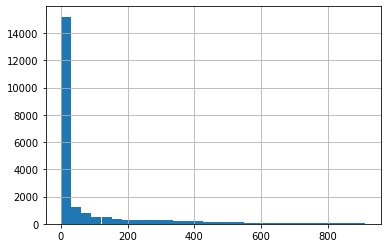

In [32]:
df["DEBIT_FIN_ISLEM_GECEN_SURE"].hist(bins = 30)

In [33]:
df.head(20)

,MUSTERIID,GUNCEL_SEGMENT,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUSTERILIK_YASI,MUSTERI_YASI,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MUS_CINSIYET,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,TIK_KPNS_MAX_TAR,TIK_VADE_MAX_TAR,TIK_KPNS_MAX_TAR_GECENSURE,TIK_VADE_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG
0,1,UKT,NaN,NaN,0.930,1.097,1.260,18.992,53.279,1,1.0,K,NaN,NaN,NaN,0.667,0.333,0.333,22.0,49.0,NaN,NaN,221.0,22.0,1.333,1.667,1.333,0,0,NaN,2012-07-15 00:00:00,NaN,3181.0,22.0,NaN,9.0,NaN,1.0,1451.0,343.227,344.757,391.450,0.000,0.000,0.000,0,0
1,2,IKT,11.0,4.0,35.507,62.923,83.367,19.250,52.474,1,1.0,E,23.333,20.667,16.667,1.000,2.000,0.333,16.0,16.0,0.0,2.0,5.0,40.0,0.000,0.000,0.000,0,0,NaN,2010-12-18 00:00:00,NaN,3756.0,16.0,NaN,NaN,0.0,40.0,20.0,NaN,NaN,NaN,0.000,0.000,0.000,1,0
2,3,VIP,0.0,0.0,4620.410,3338.493,4524.997,19.929,77.711,1,0.0,E,0.000,0.000,0.000,1.000,2.000,0.667,0.0,0.0,14.0,NaN,79.0,8.0,6.667,7.333,6.333,0,0,NaN,2010-12-24 00:00:00,NaN,3750.0,0.0,250.0,3.0,14.0,8.0,0.0,673.253,2364.497,1907.260,13756.407,4893.107,4541.090,0,0
3,4,UKT,12.0,12.0,3198.270,3743.487,5802.043,19.012,43.639,1,1.0,E,14.000,11.000,8.333,4.000,2.000,0.667,14.0,14.0,0.0,1.0,146.0,236.0,1.333,1.333,0.667,0,0,NaN,NaN,NaN,NaN,14.0,NaN,1.0,0.0,79.0,2.0,2667.753,548.773,1740.020,0.000,0.000,0.000,0,0
4,5,KIT,14.0,14.0,791.360,1864.890,9370.647,20.657,53.577,1,1.0,K,4.333,6.333,10.000,0.333,0.000,0.333,14.0,14.0,0.0,7.0,33.0,968.0,2.000,2.000,1.667,0,0,NaN,2014-01-21 00:00:00,NaN,2626.0,14.0,7.0,NaN,0.0,202.0,0.0,NaN,NaN,NaN,0.000,0.000,0.000,0,0
5,6,UKT,0.0,0.0,5086.683,3321.207,3591.443,20.947,46.138,1,1.0,E,3.333,2.333,1.333,0.000,0.000,1.333,149.0,236.0,4.0,22.0,505.0,NaN,4.000,4.000,4.000,0,0,NaN,NaN,NaN,NaN,149.0,NaN,NaN,4.0,384.0,0.0,NaN,NaN,NaN,2863.710,30.090,3464.523,0,0
6,7,KIT,NaN,1420.0,597.320,597.320,597.320,18.930,57.155,1,1.0,E,NaN,NaN,NaN,0.000,0.000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,0.000,0.000,0.000,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.000,0.000,0.000,0,0
7,8,KIT,8.0,8.0,419.220,1598.087,9696.570,14.270,32.315,1,1.0,E,28.000,29.000,36.333,2.667,5.667,7.667,9.0,9.0,0.0,0.0,301.0,156.0,4.000,4.000,3.000,0,0,NaN,NaN,NaN,NaN,9.0,NaN,NaN,0.0,156.0,0.0,NaN,NaN,NaN,4775.410,2852.463,10159.803,0,0
8,9,KIT,38.0,38.0,8.347,15.310,4.657,19.072,63.291,1,0.0,E,1.000,1.333,7.333,0.667,0.667,3.333,38.0,38.0,0.0,11.0,745.0,480.0,0.000,0.000,0.000,1,0,NaN,NaN,NaN,NaN,38.0,NaN,NaN,0.0,232.0,39.0,NaN,NaN,NaN,0.000,0.000,1442.453,0,0
9,10,ORU,11.0,11.0,0.000,789.067,0.000,20.578,50.883,1,1.0,E,NaN,NaN,NaN,1.000,3.000,2.667,11.0,11.0,NaN,NaN,16.0,NaN,0.000,0.000,0.000,1,0,NaN,NaN,NaN,NaN,11.0,2.0,2.0,NaN,195.0,97.0,12543.790,13897.950,8953.853,0.000,25.650,0.000,0,0


In [96]:
df = pd.get_dummies(df, columns=['GUNCEL_SEGMENT'])

In [97]:
df.drop(columns=["MUSTERIID"], inplace = True)

In [98]:
df.drop(columns=["TIK_VADE_MAX_TAR","TIK_KPNS_MAX_TAR"], inplace = True)

In [99]:
df = pd.get_dummies(df, columns=['MUS_CINSIYET'])

In [38]:
def forest(X, y, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    myforest = RandomForestClassifier(criterion = 'entropy', n_estimators = 100,max_depth= 10, random_state = 60)
    myforest.fit(X, y)
    myprediction_forest = myforest.predict(X_test)
    #print("Accuracy Score: ", accuracy_score(y_test,myprediction_forest))
    #print("Number of Misclassified Samples: ", (y_test != myprediction_forest).sum())
    #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_forest))

    #plot_confusion_matrix(myforest, X_test, y_test)
    #plt.show()
    
    #y_scores = myforest.predict_proba(X_test)
    #fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label = 6)
    #roc_auc = auc(fpr, tpr)

    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.title('ROC Curve of Random Forest')
    #plt.show()
    
    return confusion_matrix(y_test, myprediction_forest), precision_score(y_test,myprediction_forest), recall_score(y_test,myprediction_forest), accuracy_score(y_test,myprediction_forest), roc_auc_score(y_test, myprediction_forest), (y_test != myprediction_forest).sum()

In [43]:
#df_2 = df

In [44]:
#df_2.fillna(99999)

In [45]:
#df_2.info()

In [39]:
df.describe()

,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUSTERILIK_YASI,MUSTERI_YASI,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,TIK_KPNS_MAX_TAR_GECENSURE,TIK_VADE_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG,GUNCEL_SEGMENT_IKT,GUNCEL_SEGMENT_KIT,GUNCEL_SEGMENT_ORU,GUNCEL_SEGMENT_OZL,GUNCEL_SEGMENT_UKT,GUNCEL_SEGMENT_VIP,MUS_CINSIYET_E,MUS_CINSIYET_K
count,21830.000000,23684.000000,2.830600e+04,2.822600e+04,2.817700e+04,29658.000000,29658.000000,30000.000000,29672.000000,13737.000000,13737.000000,13737.000000,30000.000000,30000.000000,30000.000000,24511.000000,23761.000000,14530.000000,12697.000000,16198.000000,22448.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,10370.00000,16681.000000,24552.000000,13942.000000,12303.000000,14530.000000,27067.000000,28075.000000,11150.000000,11150.000000,11150.000000,3.000000e+04,3.000000e+04,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000
mean,79.437792,98.213097,5.858558e+03,6.197463e+03,5.987234e+03,17.488157,58.714463,0.977933,0.439809,6.670420,5.749911,5.269117,1.568479,1.693702,1.854632,70.071804,77.015067,57.130695,89.623061,289.936535,288.398165,0.932725,0.911957,0.874937,0.675933,0.069967,826.90270,1040.458426,65.972792,169.636709,65.869950,57.130695,163.909114,202.469884,2040.051223,2062.977919,1985.537692,4.738732e+03,2.840556e+03,3.760584e+03,0.035600,0.032333,0.228833,0.349400,0.128633,0.071233,0.186000,0.024500,0.802567,0.186500
std,160.684841,237.183018,3.516921e+04,3.699200e+04,3.456816e+04,4.461479,14.970492,0.146903,0.497457,32.013946,27.955178,19.726807,2.431588,2.607250,2.816582,147.439256,153.865915,148.408192,184.800939,270.435510,294.879183,2.040338,2.005950,1.928989,0.468033,0.255095,598.63192,1866.258368,144.102352,233.372415,171.188792,148.408192,211.138368,424.900920,2813.544702,3017.832170,2794.897501,5.945247e+04,3.242066e+04,4.025850e+04,0.185294,0.176887,0.420089,0.476788,0.334799,0.257218,0.389113,0.154598,0.398069,0.389516
min,0.000000,-335.000000,0.000000e+00,0.000000e+00,0.000000e+00,5.243000,5.547000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-33.000000,0.000000,0.000000,-214.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,-1630.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,4.180000e+00,4.627000e+00,5.937000e+00,18.875000,47.504750,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,2.000000,69.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000,338.00000,-506.000000,1.000000,6.000000,1.000000,0.000000,9.000000,0.000000,362.822750,367.263000,347.213000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,9.000000,7.000000,1.279700e+02,1.264615e+02,1.540030e+02,19.023000,58.045000,1.000000,0.000000,2.000000,1.333000,1.333000,1.000000,1.000000,1.000000,9.000000,11.000000,1.000000,12.000000,218.000000,191.000000,0.000000,0.000000,0.000000,1.000000,0.000000,674.00000,649.000000,8.000000,41.000000,3.000000,1.000000,68.000000,1.000000,1114.271500,1120.453500,1092.1135

In [47]:
"""df.drop(df[df['DEBIT_LOGIN_GECEN_SURE'] < 0].index, inplace=True)
df.drop(df[df['ATM_FIN_ISLEM_GECEN_SURE'] < 0].index, inplace=True)
df.drop(df[df['CM_LOGIN_GECEN_SURE'] < 0].index, inplace=True)
df.drop(df[df['TIK_VADE_MAX_TAR_GECENSURE'] < 0].index, inplace=True)"""

"df.drop(df[df['DEBIT_LOGIN_GECEN_SURE'] < 0].index, inplace=True)\ndf.drop(df[df['ATM_FIN_ISLEM_GECEN_SURE'] < 0].index, inplace=True)\ndf.drop(df[df['CM_LOGIN_GECEN_SURE'] < 0].index, inplace=True)\ndf.drop(df[df['TIK_VADE_MAX_TAR_GECENSURE'] < 0].index, inplace=True)"

In [40]:
def negative(rule):
    if rule <0:
        return -1

In [49]:
#df['ATM_FIN_ISLEM_GECEN_SURE_2'] = df['ATM_FIN_ISLEM_GECEN_SURE'].apply(negative)

In [46]:
df_0 = df[df["TERK_FLAG"] == 0]
df_1 = df[df["TERK_FLAG"] == 1]
df_1.shape

(2077, 49)

In [51]:
len(df[df['TIK_VADE_MAX_TAR_GECENSURE']<0])

6383

In [100]:
df.drop(columns=["TIK_VADE_MAX_TAR_GECENSURE"], inplace = True)

In [44]:
#df.fillna(-1)

In [101]:
df.drop(df[df['DEBIT_LOGIN_GECEN_SURE'] < 0].index, inplace=True)
df.drop(df[df['ATM_FIN_ISLEM_GECEN_SURE'] < 0].index, inplace=True)
df.drop(df[df['CM_LOGIN_GECEN_SURE'] < 0].index, inplace=True)

In [ ]:
#Continuous Values Categorization

In [47]:
df["DEBIT_FIN_ISLEM_GECEN_SURE"].describe()

count    21795.000000
mean     79.293049   
std      160.520510  
min      0.000000    
25%      1.000000    
50%      9.000000    
75%      58.000000   
max      912.000000  
Name: DEBIT_FIN_ISLEM_GECEN_SURE, dtype: float64

In [211]:
df["DEBIT_FIN_ISLEM_GECEN_SURE_C"] = pd.qcut(df["DEBIT_FIN_ISLEM_GECEN_SURE"], 4, retbins = False)
df["DEBIT_LOGIN_GECEN_SURE_C"] = pd.qcut(df["DEBIT_LOGIN_GECEN_SURE"], 4, retbins = False)
df["VDSZ_BKYORT_Ilk3_C"] = pd.qcut(df["VDSZ_BKYORT_Ilk3"], 4, retbins = False)
df["VDSZ_BKYORT_Ikinci_C"] = pd.qcut(df["VDSZ_BKYORT_Ikinci3"], 4, retbins = False)
df["VDSZ_BKYORT_Ucuncu3_C"] = pd.qcut(df["VDSZ_BKYORT_Ucuncu3"], 4, retbins = False)
df["MUSTERILIK_YASI_C"] = pd.qcut(df["MUSTERILIK_YASI"], 4, retbins = False)
df["MUSTERI_YASI_C"] = pd.qcut(df["MUSTERI_YASI"], 4, retbins = False)
df["MUS_CLSYRM_FLAG_C"] = pd.qcut(df["MUS_CLSYRM_FLAG"], 4, retbins = False, duplicates='drop')
df["ATM_LOGIN_GECEN_SURE_C"] = pd.qcut(df["ATM_LOGIN_GECEN_SURE"], 4, retbins = False)
df["ATM_FIN_ISLEM_GECEN_SURE_C"] = pd.qcut(df["ATM_FIN_ISLEM_GECEN_SURE"], 4, retbins = False)
df["CM_LOGIN_GECEN_SURE_C"] = pd.qcut(df["CM_LOGIN_GECEN_SURE"], 4, retbins = False)
df["SUBE_FIN_ISLEM_GECEN_SURE_C"] = pd.qcut(df["SUBE_FIN_ISLEM_GECEN_SURE"], 4, retbins = False)
df["ATM_TERK_TAR_GECENSURE_C"] = pd.qcut(df["ATM_TERK_TAR_GECENSURE"], 4, retbins = False)
df["SUBE_TERK_TAR_GECENSURE_C"] = pd.qcut(df["SUBE_TERK_TAR_GECENSURE"], 4, retbins = False)
df["VDSZ_TERK_TAR_GECENSURE_C"] = pd.qcut(df["VDSZ_TERK_TAR_GECENSURE"], 4, retbins = False, duplicates='drop')
df["GUNCEL_SEGMENT_IKT_C"] = pd.qcut(df["GUNCEL_SEGMENT_IKT"], 4, retbins = False, duplicates='drop')


In [213]:
df.head()

,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUSTERILIK_YASI,MUSTERI_YASI,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,MBL_ORT_Ilk3,MBL_ORT_Ikinci3,MBL_ORT_Ucuncu3,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,MB_LOGIN_GECEN_SURE,MB_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,DZN_ODMSYORT_Ilk3,DZN_ODMSYORT_Ikinci3,DZN_ODMSYORT_Ucuncu3,DZN_ODM_Flag,TERK_FLAG,TIK_KPNS_MAX_TAR_GECENSURE,ATM_TERK_TAR_GECENSURE,KMH_TERK_TAR_GECENSURE,KK_TERK_TAR_GECENSURE,MOB_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,KK_TUTORT_Ilk3,KK_TUTORT_Ikinci3,KK_TUTORT_Ucuncu3,YTRM_BKYORT_Ilk3,YTRM_BKYORT_Ikinci3,YTRM_BKYORT_Ucuncu3,MUS_TKP_FLAG,HGS_OGS_S6A_AKTFLK_FLAG,GUNCEL_SEGMENT_IKT,GUNCEL_SEGMENT_KIT,GUNCEL_SEGMENT_ORU,GUNCEL_SEGMENT_OZL,GUNCEL_SEGMENT_UKT,GUNCEL_SEGMENT_VIP,MUS_CINSIYET_E,MUS_CINSIYET_K,DEBIT_FIN_ISLEM_GECEN_SURE_C,DEBIT_LOGIN_GECEN_SURE_C,VDSZ_BKYORT_Ilk3_C,VDSZ_BKYORT_Ikinci_C,VDSZ_BKYORT_Ucuncu3_C,MUSTERILIK_YASI_C,MUSTERI_YASI_C,MUS_CLSYRM_FLAG_C,ATM_LOGIN_GECEN_SURE_C,ATM_FIN_ISLEM_GECEN_SURE_C,CM_LOGIN_GECEN_SURE_C,SUBE_FIN_ISLEM_GECEN_SURE_C,ATM_TERK_TAR_GECENSURE_C,SUBE_TERK_TAR_GECENSURE_C,VDSZ_TERK_TAR_GECENSURE_C,GUNCEL_SEGMENT_IKT_C
0,NaN,NaN,0.930,1.097,1.260,18.992,53.279,1,1.0,NaN,NaN,NaN,0.667,0.333,0.333,22.0,49.0,NaN,NaN,221.0,22.0,1.333,1.667,1.333,0,0,NaN,22.0,NaN,9.0,NaN,1.0,1451.0,343.227,344.757,391.45,0.000,0.000,0.00,0,0,0,0,0,0,1,0,0,1,NaN,NaN,"(-0.001, 4.22]","(-0.001, 4.649]","(-0.001, 5.98]","(18.875, 19.023]","(47.521, 58.064]","(-0.001, 1.0]","(9.0, 44.0]","(11.0, 58.0]","(218.0, 415.0]","(-0.001, 29.0]","(8.0, 35.0]","(-0.001, 9.0]","(99.0, 1451.0]","(-0.001, 1.0]"
1,11.0,4.0,35.507,62.923,83.367,19.250,52.474,1,1.0,23.333,20.667,16.667,1.000,2.000,0.333,16.0,16.0,0.0,2.0,5.0,40.0,0.000,0.000,0.000,0,0,NaN,16.0,NaN,NaN,0.0,40.0,20.0,NaN,NaN,NaN,0.000,0.000,0.00,1,0,1,0,0,0,0,0,1,0,"(9.0, 58.0]","(1.0, 7.0]","(4.22, 128.84]","(4.649, 127.029]","(5.98, 154.913]","(19.023, 19.25]","(47.521, 58.064]","(-0.001, 1.0]","(9.0, 44.0]","(11.0, 58.0]","(-0.001, 69.0]","(29.0, 191.0]","(8.0, 35.0]","(9.0, 68.0]","(1.0, 99.0]","(-0.001, 1.0]"
2,0.0,0.0,4620.410,3338.493,4524.997,19.929,77.711,1,0.0,0.000,0.000,0.000,1.000,2.000,0.667,0.0,0.0,14.0,NaN,79.0,8.0,6.667,7.333,6.333,0,0,NaN,0.0,250.0,3.0,14.0,8.0,0.0,673.253,2364.497,1907.26,13756.407,4893.107,4541.09,0,0,0,0,0,0,0,1,1,0,"(-0.001, 1.0]","(-0.001, 1.0]","(1003.876, 1377715.107]","(1028.457, 1513608.637]","(1366.65, 1404526.52]","(19.25, 21.32]","(70.292, 121.314]","(-0.001, 1.0]","(-0.001, 1.0]","(-0.001, 2.0]","(69.0, 218.0]","(-0.001, 29.0]","(-0.001, 1.0]","(-0.001, 9.0]","(-0.001, 1.0]","(-0.001, 1.0]"
3,12.0,12.0,3198.270,3743.487,5802.043,19.012,43.639,1,1.0,14.000,11.000,8.333,4.000,2.000,0.667,14.0,14.0,0.0,1.0,146.0,236.0,1.333,1.333,0.667,0,0,NaN,14.0,NaN,1.0,0.0,79.0,2.0,2667.753,548.773,1740.02,0.000,0.000,0.00,0,0,0,0,0,0,1,0,1,0,"(9.0, 58.0]","(7.0, 45.0]","(1003.876, 1377715.107]","(1028.457, 1513608.637]","(1366.65, 1404526.52]","(18.875, 19.023]","(5.545999999999999, 47.521]","(-0.001, 1.0]","(9.0, 44.0]","(11.0, 58.0]","(69.0, 218.0]","(191.0, 464.0]","(8.0, 35.0]","(68.0, 252.0]","(1.0, 99.0]","(-0.001, 1.0]"
4,14.0,14.0,791.360,1864.890,9370.647,20.657,53.577,1,1.0,4.333,6.333,10.000,0.333,0.000,0.333,14.0,14.0,0.0,7.0,33.0,968.0,2.000,2.000,1.667,0,0,NaN,14.0,7.0,NaN,0.0,202.0,0.0,NaN,NaN,NaN,0.000,0.000,0.00,0,0,0,1,0,0,0,0,0,1,"(9.0, 58.0]","(7.0, 45.0]","(128.84, 1003.876]","(1028.457, 1513608.637]","(1366.65, 1404526.52]","(19.25, 21.32]","(47.521, 58.064]","(-0.001, 1.0]","(9.0, 44.0]","(11.0, 58.0]","(-0.001, 69.0]","(464.0, 1239.0]","(8.0, 35.0]","(68.0, 252.0]","(-0.001, 1.0]","(-0.001, 1.0]"


In [71]:
df["DEBIT_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["DEBIT_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["VDSZ_BKYORT_Ilk3"].fillna(-1, inplace = True)
df["VDSZ_BKYORT_Ikinci3"].fillna(-1, inplace = True)
df["VDSZ_BKYORT_Ucuncu3"].fillna(-1, inplace = True)
df["MUSTERILIK_YASI"].fillna(-1, inplace = True)
df["MUSTERI_YASI"].fillna(-1, inplace = True)
df["MUS_CLSYRM_FLAG"].fillna(-1, inplace = True)
df["MBL_ORT_Ilk3"].fillna(-1, inplace = True)
df["MBL_ORT_Ikinci3"].fillna(-1, inplace = True)
df["MBL_ORT_Ucuncu3"].fillna(-1, inplace = True)
df["ATM_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["ATM_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["MB_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["MB_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["CM_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["SUBE_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["TIK_KPNS_MAX_TAR_GECENSURE"].fillna(-1, inplace = True)
df["ATM_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["KMH_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["KK_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["MOB_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["SUBE_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["VDSZ_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["KK_TUTORT_Ilk3"].fillna(-1, inplace = True)
df["KK_TUTORT_Ikinci3"].fillna(-1, inplace = True)
df["KK_TUTORT_Ucuncu3"].fillna(-1, inplace = True)

In [218]:
df = pd.get_dummies(df, columns=['DEBIT_FIN_ISLEM_GECEN_SURE_C'])
df = pd.get_dummies(df, columns=['DEBIT_LOGIN_GECEN_SURE_C'])
df = pd.get_dummies(df, columns=['VDSZ_BKYORT_Ilk3_C'])
df = pd.get_dummies(df, columns=['VDSZ_BKYORT_Ikinci_C'])
df = pd.get_dummies(df, columns=['VDSZ_BKYORT_Ucuncu3_C'])
df = pd.get_dummies(df, columns=['MUSTERILIK_YASI_C'])
df = pd.get_dummies(df, columns=['MUS_CLSYRM_FLAG_C'])
df = pd.get_dummies(df, columns=['ATM_LOGIN_GECEN_SURE_C'])
df = pd.get_dummies(df, columns=['ATM_FIN_ISLEM_GECEN_SURE_C'])
df = pd.get_dummies(df, columns=['CM_LOGIN_GECEN_SURE_C'])
df = pd.get_dummies(df, columns=['SUBE_FIN_ISLEM_GECEN_SURE_C'])
df = pd.get_dummies(df, columns=['ATM_TERK_TAR_GECENSURE_C'])
df = pd.get_dummies(df, columns=['SUBE_TERK_TAR_GECENSURE_C'])
df = pd.get_dummies(df, columns=['VDSZ_TERK_TAR_GECENSURE_C'])
df = pd.get_dummies(df, columns=['GUNCEL_SEGMENT_IKT_C'])

In [371]:
df["BAKIYE_FARKI"] = df["VDSZ_BKYORT_Ucuncu3"] - df["VDSZ_BKYORT_Ikinci3"]

In [374]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 29999
Columns: 105 entries, DEBIT_FIN_ISLEM_GECEN_SURE to BAKIYE_FARKI
dtypes: category(1), float64(37), int64(5), uint8(62)
memory usage: 12.9 MB


In [373]:
print(df.columns.tolist())

['DEBIT_FIN_ISLEM_GECEN_SURE', 'DEBIT_LOGIN_GECEN_SURE', 'VDSZ_BKYORT_Ilk3', 'VDSZ_BKYORT_Ikinci3', 'VDSZ_BKYORT_Ucuncu3', 'MUSTERILIK_YASI', 'MUSTERI_YASI', 'VDSZ_SHPLK_FLAG', 'MUS_CLSYRM_FLAG', 'MBL_ORT_Ilk3', 'MBL_ORT_Ikinci3', 'MBL_ORT_Ucuncu3', 'ATM_ORT_Ilk3', 'ATM_ORT_Ikinci3', 'ATM_ORT_Ucuncu3', 'ATM_LOGIN_GECEN_SURE', 'ATM_FIN_ISLEM_GECEN_SURE', 'MB_LOGIN_GECEN_SURE', 'MB_FIN_ISLEM_GECEN_SURE', 'CM_LOGIN_GECEN_SURE', 'SUBE_FIN_ISLEM_GECEN_SURE', 'DZN_ODMSYORT_Ilk3', 'DZN_ODMSYORT_Ikinci3', 'DZN_ODMSYORT_Ucuncu3', 'DZN_ODM_Flag', 'TERK_FLAG', 'TIK_KPNS_MAX_TAR_GECENSURE', 'ATM_TERK_TAR_GECENSURE', 'KMH_TERK_TAR_GECENSURE', 'KK_TERK_TAR_GECENSURE', 'MOB_TERK_TAR_GECENSURE', 'SUBE_TERK_TAR_GECENSURE', 'VDSZ_TERK_TAR_GECENSURE', 'KK_TUTORT_Ilk3', 'KK_TUTORT_Ikinci3', 'KK_TUTORT_Ucuncu3', 'YTRM_BKYORT_Ilk3', 'YTRM_BKYORT_Ikinci3', 'YTRM_BKYORT_Ucuncu3', 'MUS_TKP_FLAG', 'HGS_OGS_S6A_AKTFLK_FLAG', 'GUNCEL_SEGMENT_IKT', 'GUNCEL_SEGMENT_KIT', 'GUNCEL_SEGMENT_ORU', 'GUNCEL_SEGMENT_OZL', 

In [116]:
"""M_Predictors = df.iloc[:, lambda df: [0,1,2,3,4,5,6,7,8,9,10,
                                     11,12,13,14,15,16,17,18,19,20,
                                     21,22,23,24,26,27,28,29,30,
                                     31,32,33,34,35,36,37,38,39,40,
                                     41,42,43,44,45,46,47,48]].values
M_Classes = df.iloc[:, lambda df: [25]].values"""

In [176]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 29999
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DEBIT_FIN_ISLEM_GECEN_SURE      29949 non-null  float64 
 1   DEBIT_LOGIN_GECEN_SURE          29949 non-null  float64 
 2   VDSZ_BKYORT_Ilk3                29949 non-null  float64 
 3   VDSZ_BKYORT_Ikinci3             29949 non-null  float64 
 4   VDSZ_BKYORT_Ucuncu3             29949 non-null  float64 
 5   MUSTERILIK_YASI                 29949 non-null  float64 
 6   MUSTERI_YASI                    29949 non-null  float64 
 7   VDSZ_SHPLK_FLAG                 29949 non-null  int64   
 8   MUS_CLSYRM_FLAG                 29949 non-null  float64 
 9   MBL_ORT_Ilk3                    29949 non-null  float64 
 10  MBL_ORT_Ikinci3                 29949 non-null  float64 
 11  MBL_ORT_Ucuncu3                 29949 non-null  float64 
 12  ATM_ORT_Ilk3      

In [197]:
M_Predictors = df.iloc[:, lambda df: [3,4,5,6,7,8,12,13,14,15,16,19,20,
                                     27,41,49,50,51,52,53,54]].values

M_Classes = df.iloc[:, lambda df: [25]].values


In [198]:
X_train, X_test, Y_train, Y_test = train_test_split(
M_Predictors, M_Classes, test_size = 0.3, random_state = 2)

In [199]:
Confusion_forest, Precision_forest, Recall_forest, Accuracy_forest, Roc_Auc_forest, Misclassified_Count_forest = forest(X_train, Y_train.ravel(), X_test, Y_test.ravel())



In [200]:
Roc_Auc_forest

0.662283635893161

In [201]:
Accuracy_forest

0.9427935447968837

In [202]:
Precision_forest

0.6645367412140575

In [203]:
Recall_forest

0.3371150729335494

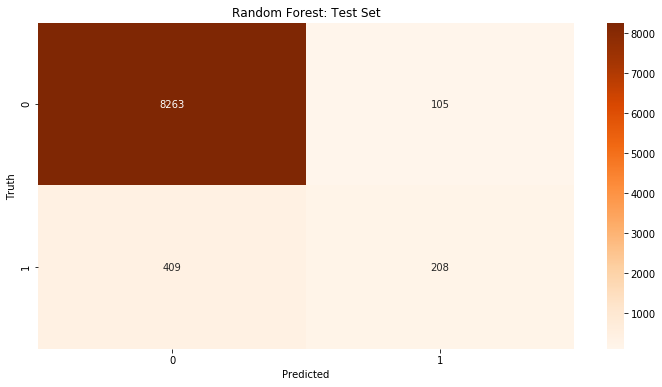

In [204]:
f, ax = plt.subplots(figsize=(12,6))
sns.heatmap(Confusion_forest, fmt='.0f', annot=True,ax=ax,
xticklabels=[0,1], yticklabels=[0,1], cmap = 'Oranges');
ax.set(xlabel = 'Predicted', ylabel='Truth',title='Random Forest: Test Set', ylim=(2,0))
plt.show()

In [ ]:
#VARIABLE IMPORTANCE TESTS

In [113]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, Y_train)
importance_of_features_dt = model_dt.feature_importances_


In [123]:
feature_names = [f'feature {i}' for i in range(M_Predictors.shape[1])]
forest_features = RandomForestClassifier(random_state=0)
forest_features.fit(X_train, Y_train.ravel())

importances = forest_features.feature_importances_
std = np.std([
    tree.feature_importances_ for tree in forest_features.estimators_], axis=0)

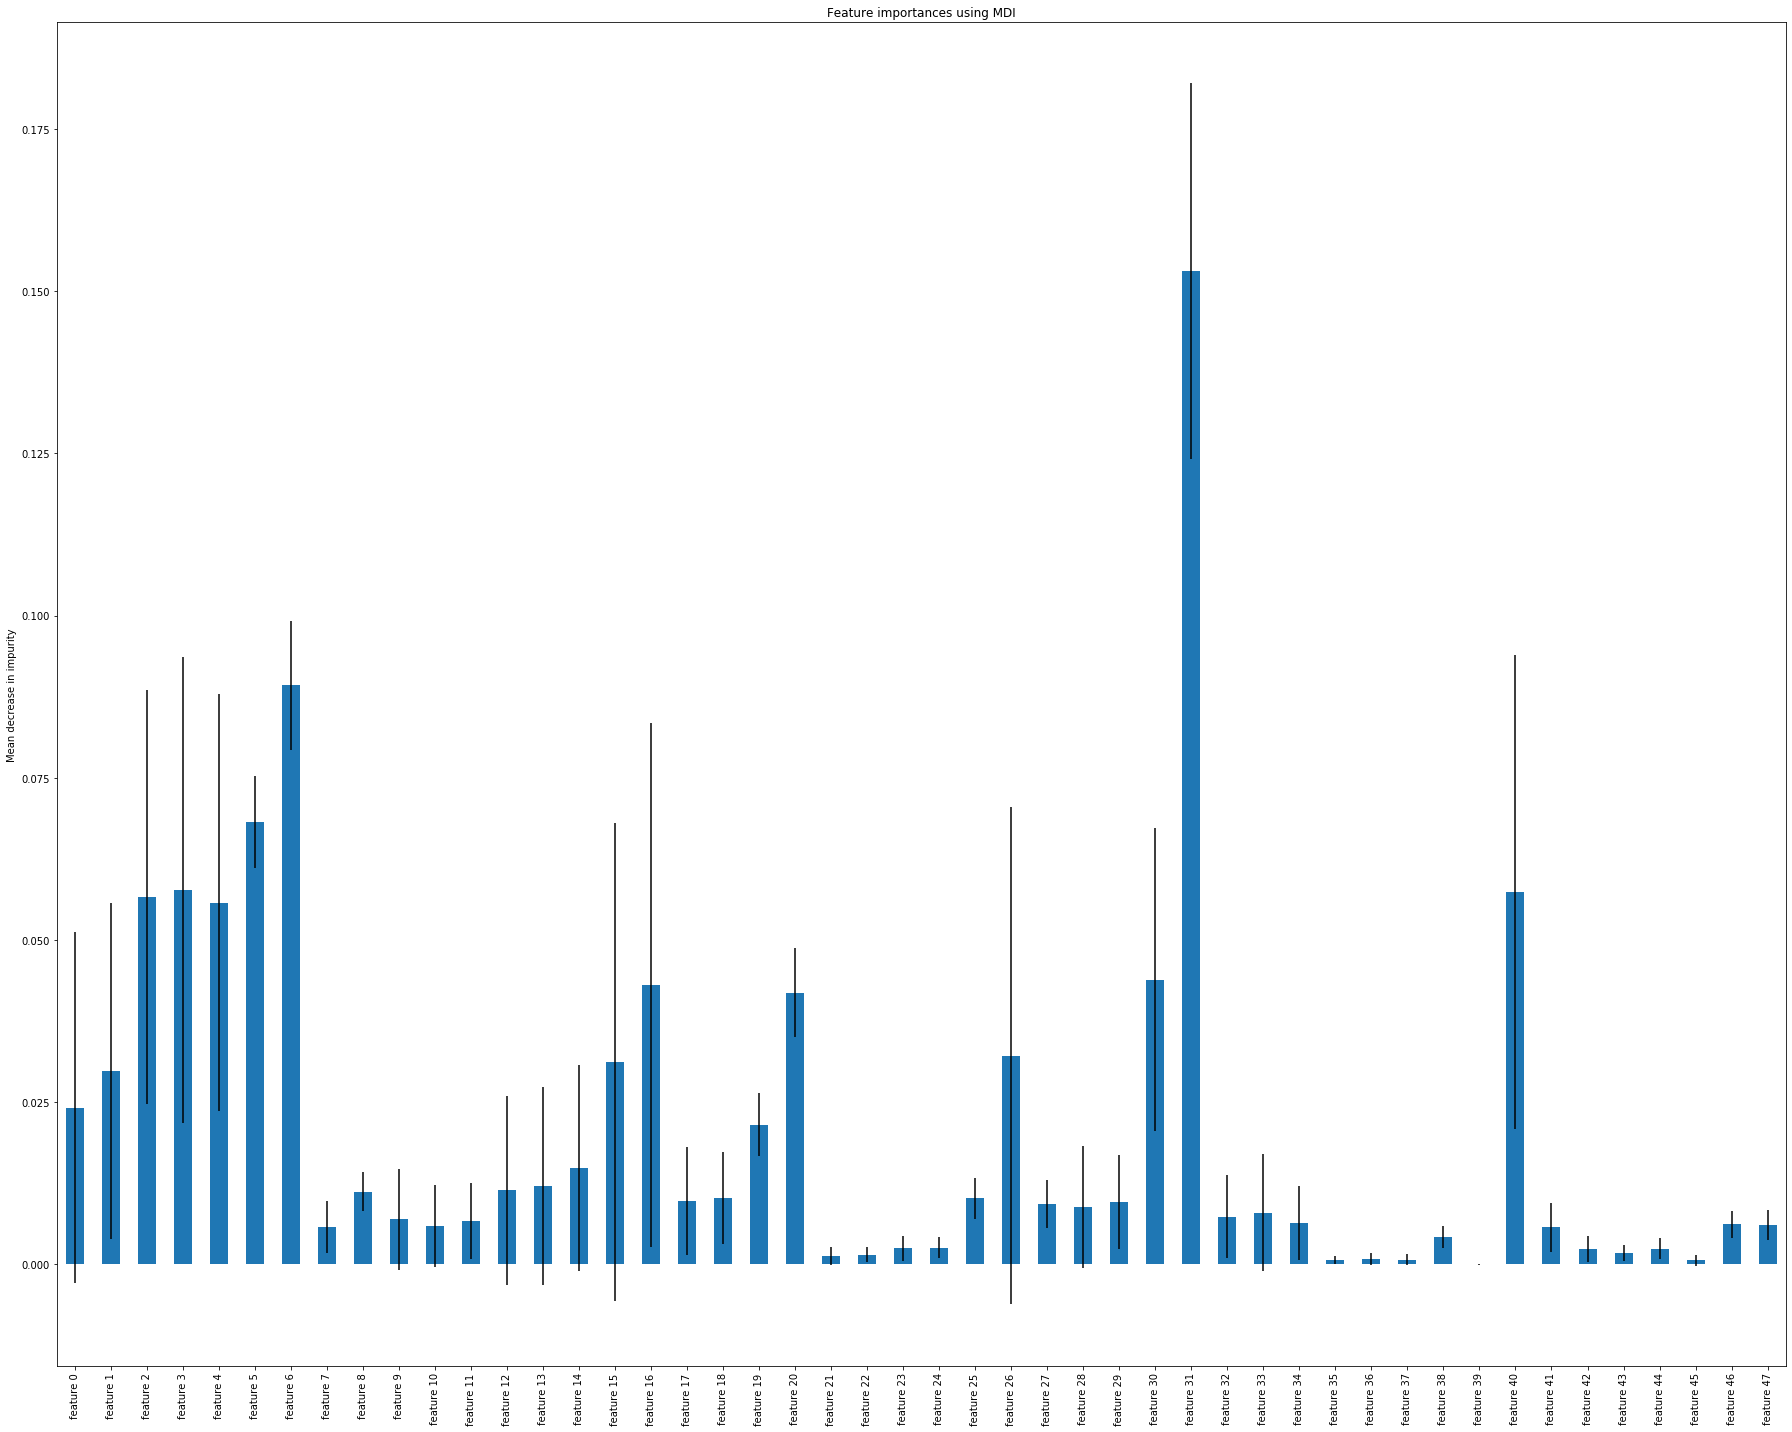

In [124]:
forest_importances = pd.Series(importances, index=feature_names)

#plt.figure(figsize=(25,20))
fig, ax = plt.subplots(figsize=(25,20))
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [127]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    forest_features, X_train, Y_train, n_repeats=10, random_state=42, n_jobs=2)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

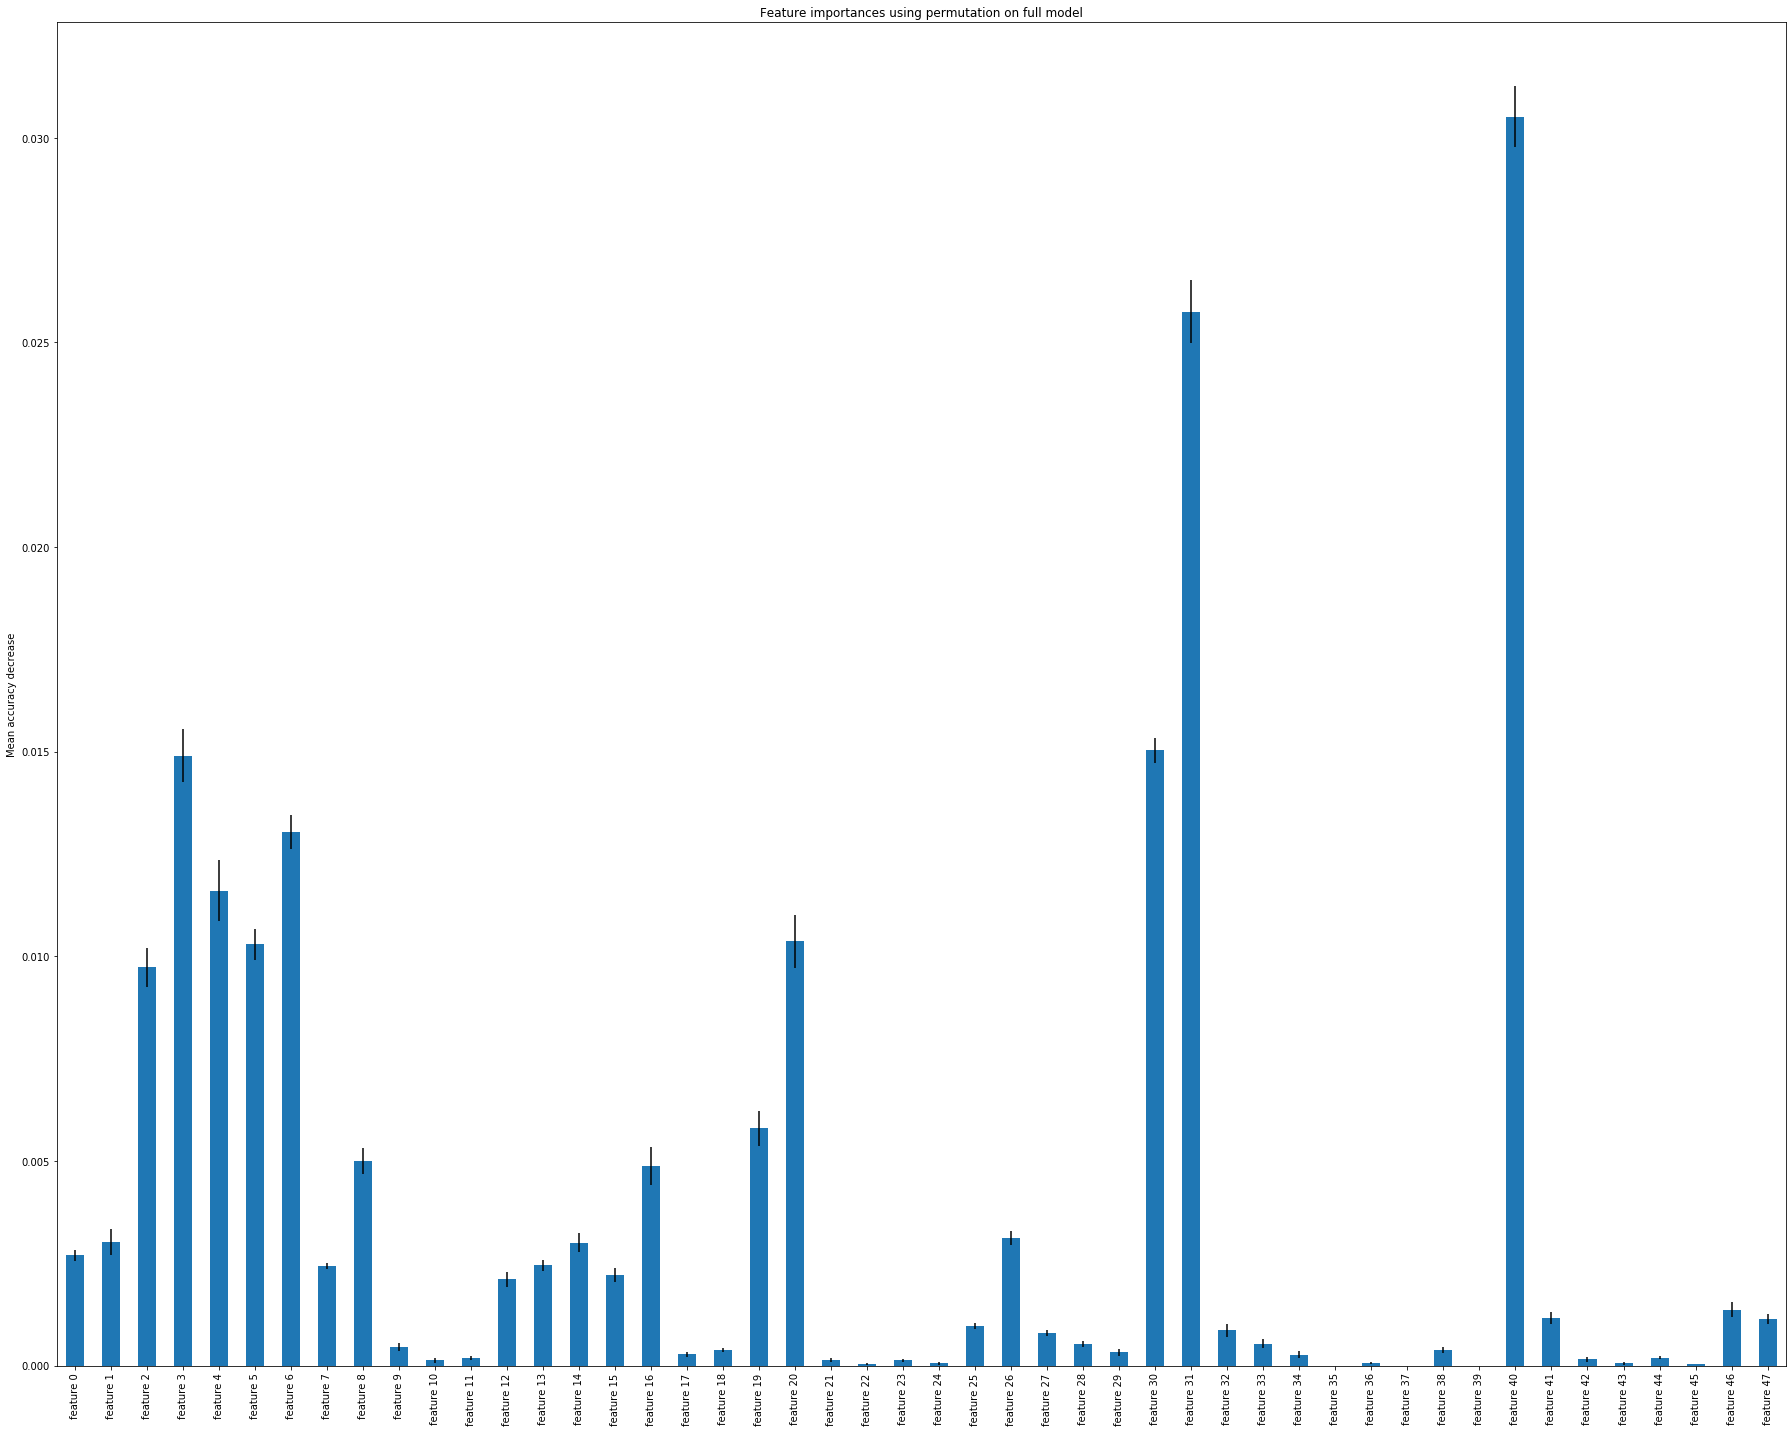

In [129]:
fig, ax = plt.subplots(figsize=(25,20))
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

In [147]:
df["DEBIT_FIN_ISLEM_GECEN_SURE"].describe()

count    29949.000000
mean     57.432235   
std      141.522674  
min     -1.000000    
25%     -1.000000    
50%      2.000000    
75%      24.000000   
max      912.000000  
Name: DEBIT_FIN_ISLEM_GECEN_SURE, dtype: float64

In [143]:
#Observation
count = 0
for i in df["DEBIT_FIN_ISLEM_GECEN_SURE"]:
    if i < 0:
        count += 1
count

8154

In [ ]:
#LOG - REG

In [366]:
df_lr = df.iloc[: , [0,1,2,3,4,5,6,7,8,12,13,14,15,16,19,20,
                                     27,31,32,41]].copy()


In [369]:
df_lr.describe()

,DEBIT_FIN_ISLEM_GECEN_SURE,DEBIT_LOGIN_GECEN_SURE,VDSZ_BKYORT_Ilk3,VDSZ_BKYORT_Ikinci3,VDSZ_BKYORT_Ucuncu3,MUSTERILIK_YASI,MUSTERI_YASI,VDSZ_SHPLK_FLAG,MUS_CLSYRM_FLAG,ATM_ORT_Ilk3,ATM_ORT_Ikinci3,ATM_ORT_Ucuncu3,ATM_LOGIN_GECEN_SURE,ATM_FIN_ISLEM_GECEN_SURE,CM_LOGIN_GECEN_SURE,SUBE_FIN_ISLEM_GECEN_SURE,ATM_TERK_TAR_GECENSURE,SUBE_TERK_TAR_GECENSURE,VDSZ_TERK_TAR_GECENSURE,GUNCEL_SEGMENT_IKT
count,29949.000000,29949.000000,2.994900e+04,2.994900e+04,2.994900e+04,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000,29949.000000
mean,57.432235,77.423687,5.536867e+03,5.840427e+03,5.632372e+03,17.280629,58.047863,0.977929,0.423954,1.570505,1.695651,1.856210,57.003706,60.704164,156.227119,215.612308,53.754616,147.850613,188.908044,0.228155
std,141.522674,214.517903,3.421693e+04,3.594116e+04,3.355967e+04,4.847573,16.171994,0.146916,0.516912,2.432967,2.608806,2.817621,135.960936,140.413765,246.031052,284.328660,132.788299,206.500628,413.682150,0.419650
min,-1.000000,-1.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,-1.000000,0.000000,1.407000e+00,1.570000e+00,2.010000e+00,18.872000,47.228000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
50%,2.000000,4.000000,9.779000e+01,9.926300e+01,1.178270e+02,19.020000,57.736000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,6.000000,8.000000,63.000000,5.000000,48.000000,1.000000,0.000000
75%,24.000000,25.000000,8.656070e+02,8.795870e+02,1.153193e+03,19.250000,70.149000,1.000000,1.000000,2.000000,2.333000,2.333000,28.000000,30.000000,244.000000,383.000000,25.000000,218.000000,76.000000,0.000000
max,912.000000,1458.000000,1.377715e+06,1.513609e+06,1.404527e+06,21.320000,121.314000,1.000000,2.000000,42.667000,46.667000,69.333000,912.000000,913.000000,1096.000000,1239.000000,912.000000,912.000000,1451.000000,1.000000


In [370]:
df_lr["DEBIT_FIN_ISLEM_GECEN_SURE_Scaled"] = df_lr["DEBIT_FIN_ISLEM_GECEN_SURE"].apply(lambda x: ((x-df_lr["DEBIT_FIN_ISLEM_GECEN_SURE"].min())/(df_lr["DEBIT_FIN_ISLEM_GECEN_SURE"].max()-0)))
df_lr["DEBIT_LOGIN_GECEN_SURE_Scaled"] = df_lr["DEBIT_LOGIN_GECEN_SURE"].apply(lambda x: ((x-df_lr["DEBIT_LOGIN_GECEN_SURE"].min())/(df_lr["DEBIT_FIN_ISLEM_GECEN_SURE"].max()-0)))
df_lr["VDSZ_BKYORT_Ilk3_Scaled"] = df_lr["VDSZ_BKYORT_Ilk3"].apply(lambda x: ((x-df_lr["VDSZ_BKYORT_Ilk3"].min())/(df_lr["VDSZ_BKYORT_Ilk3"].max()-0)))
df_lr["VDSZ_BKYORT_Ikinci3_Scaled"] = df_lr["VDSZ_BKYORT_Ikinci3"].apply(lambda x: ((x-df_lr["VDSZ_BKYORT_Ikinci3"].min())/(df_lr["VDSZ_BKYORT_Ikinci3"].max()-0)))
#df_lr["VDSZ_BKYORT_Ikinci3_Scaled"] = df_lr["VDSZ_BKYORT_Ikinci3"].apply(lambda x: ((x-df_lr["VDSZ_BKYORT_Ikinci3"].min())/(df_lr["VDSZ_BKYORT_Ikinci3"].max()-0)))
df_lr["VDSZ_BKYORT_Ucuncu3_Scaled"] = df_lr["VDSZ_BKYORT_Ucuncu3"].apply(lambda x: ((x-df_lr["VDSZ_BKYORT_Ucuncu3"].min())/(df_lr["VDSZ_BKYORT_Ucuncu3"].max()-0)))
df_lr["MUSTERILIK_YASI_Scaled"] = df_lr["MUSTERILIK_YASI"].apply(lambda x: ((x-df_lr["MUSTERILIK_YASI"].min())/(df_lr["MUSTERILIK_YASI"].max()-0)))
df_lr["MUSTERI_YASI_Scaled"] = df_lr["MUSTERI_YASI"].apply(lambda x: ((x-df_lr["MUSTERI_YASI"].min())/(df_lr["MUSTERI_YASI"].max()-0)))
df_lr["VDSZ_SHPLK_FLAG_Scaled"] = df_lr["VDSZ_SHPLK_FLAG"].apply(lambda x: ((x-df_lr["VDSZ_SHPLK_FLAG"].min())/(df_lr["VDSZ_SHPLK_FLAG"].max()-0)))
df_lr["MUS_CLSYRM_FLAG_Scaled"] = df_lr["MUS_CLSYRM_FLAG"].apply(lambda x: ((x-df_lr["MUS_CLSYRM_FLAG"].min())/(df_lr["MUS_CLSYRM_FLAG"].max()-0)))
df_lr["ATM_ORT_Ilk3_Scaled"] = df_lr["ATM_ORT_Ilk3"].apply(lambda x: ((x-df_lr["ATM_ORT_Ilk3"].min())/(df_lr["ATM_ORT_Ilk3"].max()-0)))
df_lr["ATM_ORT_Ikinci3_Scaled"] = df_lr["ATM_ORT_Ikinci3"].apply(lambda x: ((x-df_lr["ATM_ORT_Ikinci3"].min())/(df_lr["ATM_ORT_Ikinci3"].max()-0)))
df_lr["ATM_ORT_Ucuncu3_Scaled"] = df_lr["ATM_ORT_Ucuncu3"].apply(lambda x: ((x-df_lr["ATM_ORT_Ucuncu3"].min())/(df_lr["ATM_ORT_Ucuncu3"].max()-0)))
df_lr["ATM_LOGIN_GECEN_SURE_Scaled"] = df_lr["ATM_LOGIN_GECEN_SURE"].apply(lambda x: ((x-df_lr["ATM_LOGIN_GECEN_SURE"].min())/(df_lr["ATM_LOGIN_GECEN_SURE"].max()-0)))
df_lr["ATM_FIN_ISLEM_GECEN_SURE_Scaled"] = df_lr["ATM_FIN_ISLEM_GECEN_SURE"].apply(lambda x: ((x-df_lr["ATM_FIN_ISLEM_GECEN_SURE"].min())/(df_lr["ATM_FIN_ISLEM_GECEN_SURE"].max()-0)))
df_lr["CM_LOGIN_GECEN_SURE_Scaled"] = df_lr["CM_LOGIN_GECEN_SURE"].apply(lambda x: ((x-df_lr["CM_LOGIN_GECEN_SURE"].min())/(df_lr["CM_LOGIN_GECEN_SURE"].max()-0)))
df_lr["SUBE_FIN_ISLEM_GECEN_SURE_Scaled"] = df_lr["SUBE_FIN_ISLEM_GECEN_SURE"].apply(lambda x: ((x-df_lr["SUBE_FIN_ISLEM_GECEN_SURE"].min())/(df_lr["SUBE_FIN_ISLEM_GECEN_SURE"].max()-0)))
df_lr["ATM_TERK_TAR_GECENSURE_Scaled"] = df_lr["ATM_TERK_TAR_GECENSURE"].apply(lambda x: ((x-df_lr["ATM_TERK_TAR_GECENSURE"].min())/(df_lr["ATM_TERK_TAR_GECENSURE"].max()-0)))
df_lr["SUBE_TERK_TAR_GECENSURE_Scaled"] = df_lr["SUBE_TERK_TAR_GECENSURE"].apply(lambda x: ((x-df_lr["SUBE_TERK_TAR_GECENSURE"].min())/(df_lr["SUBE_TERK_TAR_GECENSURE"].max()-0)))
df_lr["VDSZ_TERK_TAR_GECENSURE_Scaled"] = df_lr["VDSZ_TERK_TAR_GECENSURE"].apply(lambda x: ((x-df_lr["VDSZ_TERK_TAR_GECENSURE"].min())/(df_lr["VDSZ_TERK_TAR_GECENSURE"].max()-0)))



In [390]:
df_lr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 29999
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   DEBIT_FIN_ISLEM_GECEN_SURE         29949 non-null  float64
 1   DEBIT_LOGIN_GECEN_SURE             29949 non-null  float64
 2   VDSZ_BKYORT_Ilk3                   29949 non-null  float64
 3   VDSZ_BKYORT_Ikinci3                29949 non-null  float64
 4   VDSZ_BKYORT_Ucuncu3                29949 non-null  float64
 5   MUSTERILIK_YASI                    29949 non-null  float64
 6   MUSTERI_YASI                       29949 non-null  float64
 7   VDSZ_SHPLK_FLAG                    29949 non-null  int64  
 8   MUS_CLSYRM_FLAG                    29949 non-null  float64
 9   ATM_ORT_Ilk3                       29949 non-null  float64
 10  ATM_ORT_Ikinci3                    29949 non-null  float64
 11  ATM_ORT_Ucuncu3                    29949 non-null  flo

In [392]:
M_Predictors_lr = df_lr.iloc[:, lambda df_lr: [20,21,22,23,24,25,26,27,28,29,30,
                                           31,32,33,34,35,36,37,38]].values

M_Classes_lr = df.iloc[:, lambda df: [25]].values



In [393]:
X_train_lr, X_test_lr, Y_train_lr, Y_test_lr = train_test_split(
M_Predictors_lr, M_Classes_lr, test_size = 0.3, random_state = 2)

In [159]:
def logistic(X, y, X_test, y_test):
    #from sklearn.linear_model import Perceptron
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score

    for i in range (30,31):
        mylogreg = LogisticRegression(penalty = 'l2', max_iter = 1000, random_state = 60)
        mylogreg.fit(X, y)
        myprediction_logreg = mylogreg.predict(X_test)
        #print(accuracy_score(y_test,myprediction_perceptron))
        
        #print("Accuracy Score: ", accuracy_score(y_test,myprediction_perceptron))
        #print("Number of Misclassified Samples: ", (y_test != myprediction_perceptron).sum())
        #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_perceptron))

    #plot_confusion_matrix(myperceptron, X_test, y_test)
    #plt.show()
    
    return confusion_matrix(y_test, myprediction_logreg),precision_score(y_test,myprediction_logreg), recall_score(y_test,myprediction_logreg) ,accuracy_score(y_test,myprediction_logreg), roc_auc_score(y_test, myprediction_logreg), (y_test != myprediction_logreg).sum()


In [394]:
Conf_logistic, Precision_logistic, Recall_logistic, Accuracy_logistic, Roc_Auc_logistic, Misclassified_Count_logistic = logistic(X_train_lr, Y_train_lr.ravel(), X_test_lr, Y_test_lr.ravel())


In [395]:
Accuracy_logistic

0.9307735114079021

In [396]:
Recall_logistic

0.009724473257698542

In [397]:
Precision_logistic

0.35294117647058826

In [398]:
Conf_logistic

array([[8357,   11],
       [ 611,    6]])

In [ ]:
#KNN

In [163]:
def KNeighbors(X, y, X_test, y_test):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score, plot_confusion_matrix, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    accuracy_score_holder = []
    misclassified_sample_count = []
    precision_score_holder_KNN = []
    roc_auc_score_holder = []
    confusion_matrix_holder_KNN = []
    recall_score_holder_KNN = []
    for i in range (3,12):
        knn=KNeighborsClassifier(n_neighbors=i, p=2, metric='minkowski') 
        knn.fit(X, y)
        myprediction_knn = knn.predict(X_test)
        accuracy_score_holder.append(accuracy_score(y_test, myprediction_knn))
        misclassified_sample_count.append((y_test != myprediction_knn).sum())
        roc_auc_score_holder.append(roc_auc_score(y_test, myprediction_knn))
        recall_score_KNN = recall_score(y_test, myprediction_knn)
        precision_score_holder_KNN.append(precision_score(y_test, myprediction_knn))
        recall_score_holder_KNN.append(recall_score(y_test, myprediction_knn))
        confusion_matrix_holder_KNN.append(confusion_matrix(y_test, myprediction_knn))
        #precision_score_holder.append(y_test, knn.predict(X_test), average = 'micro')
        i = i + 1
    #print("Accuracy Score:", accuracy_score_holder)
    #print("Precision Score:", precision_score_holder)
    #print("Misclassified samples:", misclassified_sample_count)
    #print("ROC - AUC Score:", roc_auc_score_holder)
    #plot_confusion_matrix(knn, X_test, y_test)
    #plt.show()
    
    #y_scores = knn.predict_proba(X_test)
    #fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label = 6)
    #roc_auc = auc(fpr, tpr)

    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.title('ROC Curve of kNN')
    #plt.show()
    
    return  confusion_matrix_holder_KNN, precision_score_holder_KNN, recall_score_holder_KNN, accuracy_score_holder, roc_auc_score_holder, misclassified_sample_count


In [349]:
Conf_KNN, Precision_KNN, Recall_KNN, Accuracy_KNN, Roc_Auc_KNN, Misclassified_Count_KNN = KNeighbors(X_train, Y_train.ravel(), X_test, Y_test.ravel())

In [351]:
Accuracy_KNN

[0.9434613244296048,
 0.9475792988313857,
 0.9462437395659432,
 0.9483583750695603,
 0.9469115191986645,
 0.9492487479131887,
 0.9475792988313857,
 0.9483583750695603,
 0.9462437395659432]

In [352]:
Precision_KNN

[0.6224719101123596,
 0.737012987012987,
 0.6700507614213198,
 0.7593220338983051,
 0.6955307262569832,
 0.7692307692307693,
 0.7085714285714285,
 0.7647058823529411,
 0.6982248520710059]

In [350]:
Recall_KNN

[0.44894651539708263,
 0.3679092382495948,
 0.42787682333873583,
 0.36304700162074555,
 0.4035656401944895,
 0.3727714748784441,
 0.4019448946515397,
 0.3581847649918963,
 0.3824959481361426]

In [166]:
#Categorization of numeric (continuous) attributes

In [ ]:
def new_column(dataframe):
    if dataframe[X] < 157:
        dataframe["Ship_Domain_Edited_2"] = 1.75 * dataframe["Base Ship Length (m)"]
        return dataframe["Ship_Domain_Edited_2"]
    if dataframe["Base Ship Length (m)"] >= 157:
        dataframe["Ship_Domain_Edited_2"] = 3 * dataframe["Base Ship Length (m)"]
        return dataframe["Ship_Domain_Edited_2"]

In [169]:
df["DEBIT_FIN_ISLEM_GECEN_SURE"].describe()

count    29949.000000
mean     57.432235   
std      141.522674  
min     -1.000000    
25%     -1.000000    
50%      2.000000    
75%      24.000000   
max      912.000000  
Name: DEBIT_FIN_ISLEM_GECEN_SURE, dtype: float64

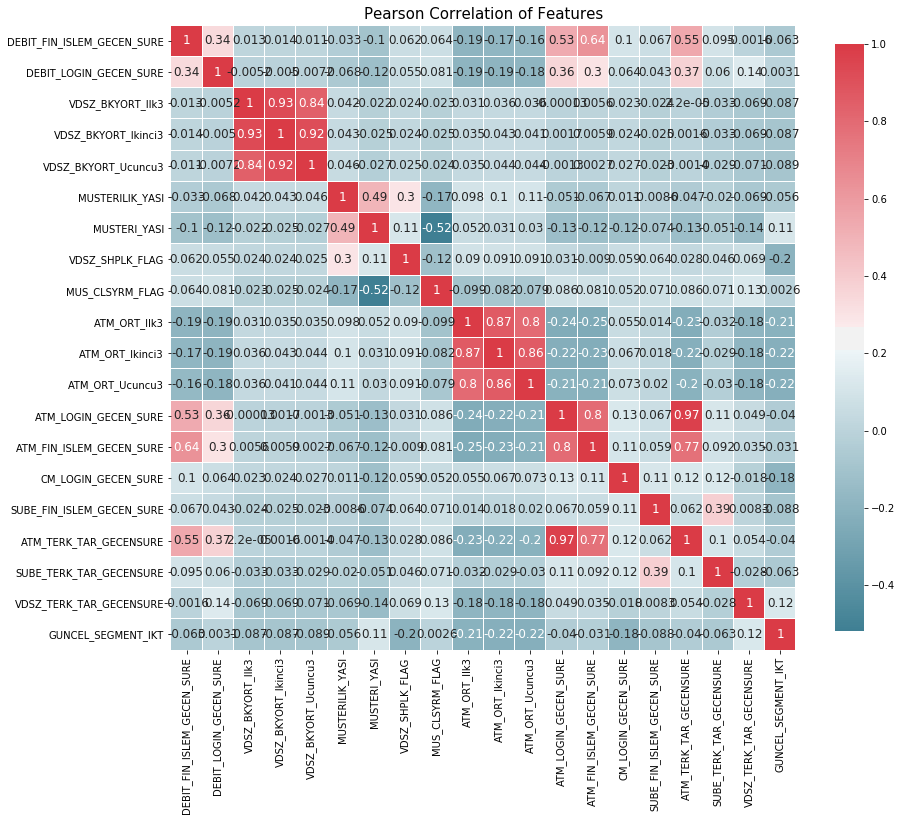

In [356]:
df_corr = df.iloc[: , [0,1,2,3,4,5,6,7,8,12,13,14,15,16,19,20,
                                     27,31,32,41]].copy() 

def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(14, 12))
    colormap = sns.diverging_palette(220, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df_corr)

In [ ]:
M_Predictors = df.iloc[:, lambda df: [0,1,2,3,4,5,6,7,8,12,13,14,15,16,19,20,
                                     27,31,32,41]].values

M_Classes = df.iloc[:, lambda df: [25]].values



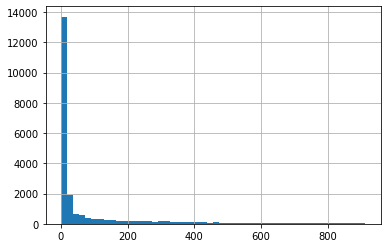

In [49]:
df.iloc[:,0].hist(bins = 50)

(array([24114.,  1204.,   781.,   581.,   484.,   431.,   479.,   280.,
          305.,   201.,   179.,   173.,   137.,   121.,    93.,    96.,
           86.,    61.,    73.,    70.]),
 array([ -1.  ,  44.65,  90.3 , 135.95, 181.6 , 227.25, 272.9 , 318.55,
        364.2 , 409.85, 455.5 , 501.15, 546.8 , 592.45, 638.1 , 683.75,
        729.4 , 775.05, 820.7 , 866.35, 912.  ]),
 <a list of 20 Patch objects>)

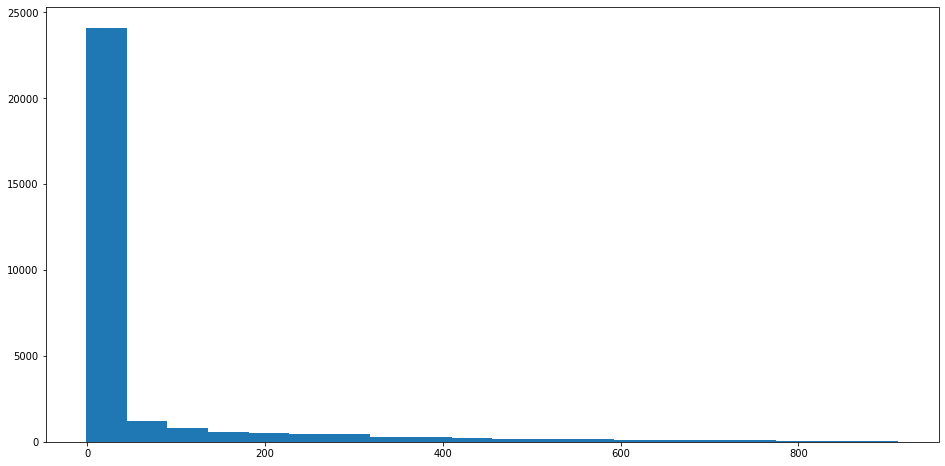

In [207]:
plt.figure(figsize=(16,8))
plt.hist(df.iloc[:,0].ravel(), bins = 20)

In [146]:
#add a new column category next to the feature group. 
category = pd.cut(df.DEBIT_FIN_ISLEM_GECEN_SURE,bins=[-0.1,22.8,45.6,100000],labels=[0,1,2])
df.insert(49,'CAT_DEBIT_FIN_ISLEM_GECEN_SURE',category)

In [150]:
#add a new column category next to the feature group. 
category = pd.cut(df.DEBIT_LOGIN_GECEN_SURE,bins=[-0.1,36.45,72.9,100000],labels=[0,1,2])
df.insert(50,'CAT_DEBIT_LOGIN_GECEN_SURE',category)

In [158]:
#add a new column category next to the feature group. 
category = pd.cut(df.VDSZ_BKYORT_Ilk3,bins=[-0.1,68886,100000],labels=[0,1])
df.insert(51,'CAT_VDSZ_BKYORT_Ilk3',category)

In [160]:
#add a new column category next to the feature group. 
category = pd.cut(df.VDSZ_BKYORT_Ikinci3,bins=[-0.1,30272,100000],labels=[0,1])
df.insert(52,'CAT_VDSZ_BKYORT_Ikinci3',category)
#6,41,31,32

In [165]:
#add a new column category next to the feature group. 
category = pd.cut(df.SUBE_TERK_TAR_GECENSURE,bins=[-0.1,183,100000],labels=[0,1])
df.insert(52,'CAT_SUBE_TERK_TAR_GECENSURE',category)

In [169]:
#add a new column category next to the feature group. 
category = pd.cut(df.VDSZ_TERK_TAR_GECENSURE,bins=[-0.1,97,1354,100000],labels=[0,1,2])
df.insert(53,'CAT_VDSZ_TERK_TAR_GECENSURE',category)

(array([23116.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,     0.,     0.,     0.,     0.,     0.,  6833.]),
 array([0.        , 0.06666667, 0.13333333, 0.2       , 0.26666667,
        0.33333333, 0.4       , 0.46666667, 0.53333333, 0.6       ,
        0.66666667, 0.73333333, 0.8       , 0.86666667, 0.93333333,
        1.        ]),
 <a list of 15 Patch objects>)

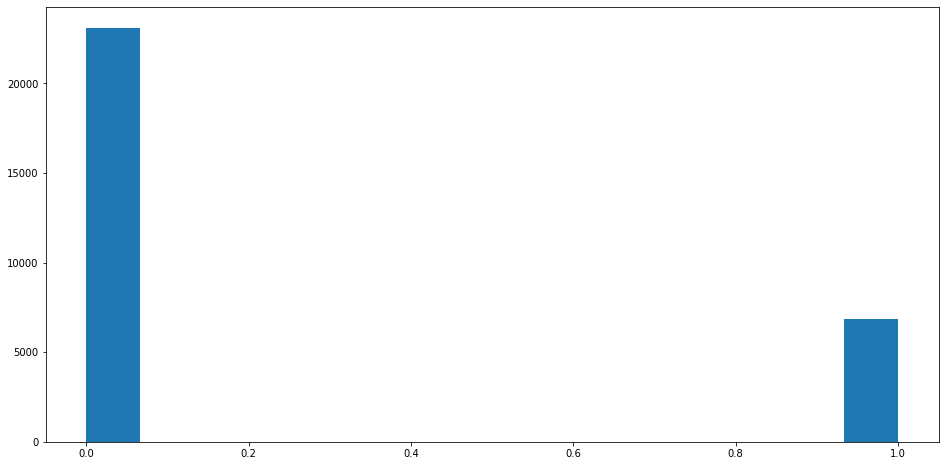

In [170]:
plt.figure(figsize=(16,8))
plt.hist(df.iloc[:,41].ravel(), bins = 15)

In [144]:
"""df.drop(columns=["CAT_DEBIT_FIN_ISLEM_GECEN_SURE"], inplace = True)"""

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 29999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DEBIT_FIN_ISLEM_GECEN_SURE      21795 non-null  float64 
 1   DEBIT_LOGIN_GECEN_SURE          23636 non-null  float64 
 2   VDSZ_BKYORT_Ilk3                28256 non-null  float64 
 3   VDSZ_BKYORT_Ikinci3             28176 non-null  float64 
 4   VDSZ_BKYORT_Ucuncu3             28127 non-null  float64 
 5   MUSTERILIK_YASI                 29608 non-null  float64 
 6   MUSTERI_YASI                    29608 non-null  float64 
 7   VDSZ_SHPLK_FLAG                 29949 non-null  int64   
 8   MUS_CLSYRM_FLAG                 29621 non-null  float64 
 9   MBL_ORT_Ilk3                    13718 non-null  float64 
 10  MBL_ORT_Ikinci3                 13718 non-null  float64 
 11  MBL_ORT_Ucuncu3                 13718 non-null  float64 
 12  ATM_ORT_Ilk3      

In [172]:
df["DEBIT_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["DEBIT_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["VDSZ_BKYORT_Ilk3"].fillna(-1, inplace = True)
df["VDSZ_BKYORT_Ikinci3"].fillna(-1, inplace = True)
df["VDSZ_BKYORT_Ucuncu3"].fillna(-1, inplace = True)
df["MUSTERILIK_YASI"].fillna(-1, inplace = True)
df["MUSTERI_YASI"].fillna(-1, inplace = True)
df["MUS_CLSYRM_FLAG"].fillna(-1, inplace = True)
df["MBL_ORT_Ilk3"].fillna(-1, inplace = True)
df["MBL_ORT_Ikinci3"].fillna(-1, inplace = True)
df["MBL_ORT_Ucuncu3"].fillna(-1, inplace = True)
df["ATM_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["ATM_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["MB_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["MB_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["CM_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["SUBE_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
df["TIK_KPNS_MAX_TAR_GECENSURE"].fillna(-1, inplace = True)
df["ATM_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["KMH_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["KK_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["MOB_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["SUBE_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["VDSZ_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["KK_TUTORT_Ilk3"].fillna(-1, inplace = True)
df["KK_TUTORT_Ikinci3"].fillna(-1, inplace = True)
df["KK_TUTORT_Ucuncu3"].fillna(-1, inplace = True)


In [173]:
df["CAT_DEBIT_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace = True)
"""df["CAT_DEBIT_LOGIN_GECEN_SURE"].fillna(-1, inplace = True)
df["CAT_VDSZ_BKYORT_Ilk3"].fillna(-1, inplace = True)
df["CAT_SUBE_TERK_TAR_GECENSURE"].fillna(-1, inplace = True)
df["CAT_VDSZ_BKYORT_Ikinci3"].fillna(-1, inplace = True)"""

df["CAT_DEBIT_FIN_ISLEM_GECEN_SURE"] = df["CAT_DEBIT_FIN_ISLEM_GECEN_SURE"].cat.add_categories(-1)
df["CAT_DEBIT_FIN_ISLEM_GECEN_SURE"].fillna(-1, inplace =True) 


ValueError: fill value must be in categories

In [194]:
g_without_nan = df["CAT_VDSZ_TERK_TAR_GECENSURE"].cat.add_categories(-1).fillna(-1)

In [195]:
df["CAT_VDSZ_TERK_TAR_GECENSURE"] = g_without_nan

In [196]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29949 entries, 0 to 29999
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   DEBIT_FIN_ISLEM_GECEN_SURE      29949 non-null  float64 
 1   DEBIT_LOGIN_GECEN_SURE          29949 non-null  float64 
 2   VDSZ_BKYORT_Ilk3                29949 non-null  float64 
 3   VDSZ_BKYORT_Ikinci3             29949 non-null  float64 
 4   VDSZ_BKYORT_Ucuncu3             29949 non-null  float64 
 5   MUSTERILIK_YASI                 29949 non-null  float64 
 6   MUSTERI_YASI                    29949 non-null  float64 
 7   VDSZ_SHPLK_FLAG                 29949 non-null  int64   
 8   MUS_CLSYRM_FLAG                 29949 non-null  float64 
 9   MBL_ORT_Ilk3                    29949 non-null  float64 
 10  MBL_ORT_Ikinci3                 29949 non-null  float64 
 11  MBL_ORT_Ucuncu3                 29949 non-null  float64 
 12  ATM_ORT_Ilk3      

In [211]:
def tree(X, y, X_test, y_test):
    from sklearn.tree import DecisionTreeClassifier
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    
    decision_tree = DecisionTreeClassifier(random_state=0, max_depth=10)
    decision_tree.fit(X, y)
    myprediction_decision_tree = decision_tree.predict(X_test)
    #print("Accuracy Score: ", accuracy_score(y_test,myprediction_forest))
    #print("Number of Misclassified Samples: ", (y_test != myprediction_forest).sum())
    #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_forest))

    #plot_confusion_matrix(myforest, X_test, y_test)
    #plt.show()
    
    #y_scores = myforest.predict_proba(X_test)
    #fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label = 6)
    #roc_auc = auc(fpr, tpr)

    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.title('ROC Curve of Random Forest')
    #plt.show()
    
    return confusion_matrix(y_test, myprediction_decision_tree), precision_score(y_test,myprediction_decision_tree), recall_score(y_test,myprediction_decision_tree), accuracy_score(y_test,myprediction_decision_tree), roc_auc_score(y_test, myprediction_decision_tree), (y_test != myprediction_decision_tree).sum()



In [212]:
Conf_Tree, Precision_Tree, Recall_Tree, Accuracy_Tree, Roc_Auc_Tree, Misclassified_Count_Tree = tree(X_train, Y_train.ravel(), X_test, Y_test.ravel())



In [ ]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [219]:
def nb(X, y, X_test, y_test):
    from sklearn.naive_bayes import GaussianNB
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    
    gnb = GaussianNB()
    y_pred = gnb.fit(X, y).predict(X_test)
    #print("Accuracy Score: ", accuracy_score(y_test,myprediction_forest))
    #print("Number of Misclassified Samples: ", (y_test != myprediction_forest).sum())
    #print("ROC - AUC Score:", roc_auc_score(y_test, myprediction_forest))

    #plot_confusion_matrix(myforest, X_test, y_test)
    #plt.show()
    
    #y_scores = myforest.predict_proba(X_test)
    #fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1], pos_label = 6)
    #roc_auc = auc(fpr, tpr)

    #plt.title('Receiver Operating Characteristic')
    #plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    #plt.legend(loc = 'lower right')
    #plt.plot([0, 1], [0, 1],'r--')
    #plt.xlim([0, 1])
    #plt.ylim([0, 1])
    #plt.ylabel('True Positive Rate')
    #plt.xlabel('False Positive Rate')
    #plt.title('ROC Curve of Random Forest')
    #plt.show()
    
    return confusion_matrix(y_test, y_pred), precision_score(y_test,y_pred), recall_score(y_test,y_pred), accuracy_score(y_test,y_pred), roc_auc_score(y_test, y_pred), (y_test != y_pred).sum()



In [220]:
Conf_NB, Precision_NB, Recall_NB, Accuracy_NB, Roc_Auc_NB, Misclassified_Count_NB = nb(X_train, Y_train.ravel(), X_test, Y_test.ravel())



In [221]:
Conf_NB

array([[3363, 5005],
       [  52,  565]])

In [222]:
Precision_NB

0.10143626570915619

In [223]:
Recall_NB

0.9157212317666127

In [224]:
Accuracy_NB

0.4371730662214802

In [216]:
#C5, Arranged, 2 Removed

#Arranged Ship Domains, C3, Easy Ensemble DT
results_v_arranged_C5_2 = {
    "EasyEnsemble LR" : [Precision_easy_lr_C5_2_arranged, Recall_easy_lr_C5_2_arranged, Accuracy_easy_lr_C5_2_arranged, Roc_Auc_easy_lr_C5_2_arranged],
    "EasyEnsemble DT" : [Precision_easy_d_C5_2_arranged, Recall_easy_d_C5_2_arranged, Accuracy_easy_d_C5_2_arranged, Roc_Auc_easy_d_C5_2_arranged],
    "RusBoost LR" : [Precision_rus_lr_C5_2_arranged, Recall_rus_lr_C5_2_arranged, Accuracy_rus_lr_C5_2_arranged, Roc_Auc_rus_lr_C5_2_arranged],
    "RusBoost DT" : [Precision_rus_d_C5_2_arranged, Recall_rus_d_C5_2_arranged, Accuracy_rus_d_C5_2_arranged, Roc_Auc_rus_d_C5_2_arranged]
    
}

outcomes_df_arranged_C5_2 = pd.DataFrame(results_v_arranged_C5_2, columns = ["EasyEnsemble LR", "EasyEnsemble DT", 
                                               "RusBoost LR", "RusBoost DT"],
                          index = ["Precision", "Recall", "Accuracy", "Roc_Auc"])

outcomes_df_arranged_C5_2 = outcomes_df_arranged_C5_2.style.set_properties(**{
    'font-size': '15pt',
})

outcomes_df_arranged_C5_2

AttributeError: 'function' object has no attribute 'export_graphviz'

In [225]:
from imblearn.under_sampling import RandomUnderSampler 


ModuleNotFoundError: No module named 'imblearn'